<center><h1> Accidents Corporels de la Route </h1></center>
<center> - </center>
<center> En France en 2017, Projet Data Visualization IGR204 </center>
<center> `Télécom ParisTech` </center>

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
def set_color(data, col) :
    categories = np.unique(data[col])
    colors = np.linspace(0, 1, len(categories))
    colordict = dict(zip(categories, colors))

    return data[col].apply(lambda x: colordict[x])

# The data

The data are avaialble on the French government's website.

#### 1) Véhicules impliqués dans l'accident

- `Num_Acc` : Identifiant de l’accident identique à celui du fichier "rubrique CARACTERISTIQUES" repris pour chacun des véhicules décrits impliqués dans l’accident
- `Num_Veh` : Identifiant du véhicule repris pour chacun des usagers occupant ce véhicule (y compris les piétons qui sont rattachés aux véhicules qui les ont heurtés) – Code alphanumérique
- `senc` : Sens de circulation :
    - 1 – PK ou PR ou numéro d’adresse postale croissant
    - 2 – PK ou PR ou numéro d’adresse postale décroissant
- `catv` : Catégorie du véhicule :
    - 01 - Bicyclette
    - 02 - Cyclomoteur <50cm3
    - 03 - Voiturette (Quadricycle à moteur carrossé) (anciennement "voiturette ou tricycle à moteur")
    - 04 - Référence plus utilisée depuis 2006 (scooter immatriculé)
    - 05 - Référence plus utilisée depuis 2006 (motocyclette)
    - 06 - Référence plus utilisée depuis 2006 (side-car)
    - 07 - VL seul
    - 08 - Catégorie plus utilisée (VL + caravane)
    - 09 - Catégorie plus utilisée (VL + remorque)
    - 10 - VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <=3,5T)
    - 11 - Référence plus utilisée depuis 2006 (VU (10) + caravane)
    - 12 - Référence plus utilisée depuis 2006 (VU (10) + remorque)
    - 13 - PL seul 3,5T <PTCA <= 7,5T
    - 14 - PL seul > 7,5T
    - 15 - PL > 3,5T + remorque
    - 16 - Tracteur routier seul
    - 17 - Tracteur routier + semi-remorque
    - 18 - Référence plus utilisée depuis 2006 (transport en commun)
    - 19 - Référence plus utilisée depuis 2006 (tramway)
    - 20 - Engin spécial
    - 21 - Tracteur agricole
    - 30 - Scooter < 50 cm3
    - 31 - Motocyclette > 50 cm3 et <= 125 cm3
    - 32 - Scooter > 50 cm3 et <= 125 cm3
    - 33 - Motocyclette > 125 cm3
    - 34 - Scooter > 125 cm3
    - 35 - Quad léger <= 50 cm3 (Quadricycle à moteur non carrossé)
    - 36 - Quad lourd > 50 cm3 (Quadricycle à moteur non carrossé)
    - 37 - Autobus
    - 38 - Autocar
    - 39 - Train
    - 40 - Tramway
    - 99 - Autre véhicule
- `obs` : Obstacle fixe heurté :
    - 1 – Véhicule en stationnement
    - 2 – Arbre
    - 3 – Glissière métallique
    - 4 – Glissière béton
    - 5 – Autre glissière
    - 6 – Bâtiment, mur, pile de pont
    - 7 – Support de signalisation verticale ou poste d’appel d’urgence
    - 8 – Poteau
    - 9 – Mobilier urbain 
    - 10 – Parapet
    - 11 – Ilot, refuge, borne haute
    - 12 – Bordure de trottoir
    - 13 – Fossé, talus, paroi rocheuse
    - 14 – Autre obstacle fixe sur chaussée
    - 15 – Autre obstacle fixe sur trottoir ou accotement
    - 16 – Sortie de chaussée sans obstacle
- `obsm` : Obstacle mobile heurté :
    - 1 – Piéton
    - 2 – Véhicule
    - 4 – Véhicule sur rail
    - 5 – Animal domestique
    - 6 – Animal sauvage
    - 9 – Autre
- `choc` : Point de choc initial :
    - 1 - Avant
    - 2 – Avant droit
    - 3 – Avant gauche
    - 4 – Arrière
    - 5 – Arrière droit
    - 6 – Arrière gauche
    - 7 – Côté droit
    - 8 – Côté gauche
    - 9 – Chocs multiples (tonneaux)
- `manv` : Manœuvre principale avant l’accident :
    - 1 – Sans changement de direction
    - 2 – Même sens, même file
    - 3 – Entre 2 files
    - 4 – En marche arrière
    - 5 – A contresens
    - 6 – En franchissant le terre-plein central
    - 7 – Dans le couloir bus, dans le même sens
    - 8 – Dans le couloir bus, dans le sens inverse
    - 9 – En s’insérant
    - 10 – En faisant demi-tour sur la chaussée
    - Changeant de file
        - 11 – A gauche
        - 12 – A droite
    - Déporté
        - 13 – A gauche
        - 14 – A droite
    - Tournant
        - 15 – A gauche
        - 16 – A droite
    - Dépassant
        - 17 – A gauche
        - 18 – A droite
    -Divers
        - 19 – Traversant la chaussée
        - 20 – Manœuvre de stationnement
        - 21 – Manœuvre d’évitement
        - 22 – Ouverture de porte
        - 23 – Arrêté (hors stationnement)
        - 24 – En stationnement (avec occupants) 
- `occutc` : Nombre d’occupants dans le transport en commun 

In [2]:
veh = pd.read_csv('Accidents/vehicules-2017.csv')
veh.head()

Num_Acc  senc  catv  occutc  obs  obsm  choc  manv num_veh
0  201700000001   0.0     7       0  0.0   2.0   3.0   9.0     B01
1  201700000001   0.0    10       0  0.0   2.0   3.0  13.0     A01
2  201700000002   0.0     7       0  0.0   0.0   1.0  16.0     A01
3  201700000002   0.0     1       0  0.0   0.0   7.0   1.0     B01
4  201700000003   0.0    10       0  0.0   2.0   1.0   1.0     C01

#### 2) Usagers 

- `Num_Acc` : Identifiant de l’accident identique à celui du fichier "rubrique CARACTERISTIQUES" repris pour chacun des usagers décrits impliqués dans l’accident
- `Num_Veh` :Identifiant du véhicule repris pour chacun des usagers occupant ce véhicule (y compris les piétons qui sont rattachés aux véhicules qui les ont heurtés) – Code alphanumérique 
- `place` : Permet de situer la place occupée dans le véhicule par l'usager au moment de l'accident
- `catu` : Catégorie d'usager :
    - 1 - Conducteur
    - 2 - Passager
    - 3 - Piéton
    - 4 - Piéton en roller ou en trottinette
- `grav` : Gravité de l'accident : Les usagers accidentés sont classés en trois catégories de victimes plus les indemnes
    - 1 - Indemne
    - 2 - Tué
    - 3 - Blessé hospitalisé
    - 4 - Blessé léger
- `sexe` : Sexe de l'usager
    - 1 - Masculin
    - 2 – Féminin
- `An_nais` : Année de naissance de l'usager
- `trajet` : Motif du déplacement au moment de l’accident :
    - 1 – Domicile – travail
    - 2 – Domicile – école
    - 3 – Courses – achats
    - 4 – Utilisation professionnelle
    - 5 – Promenade – loisirs
    - 9 – Autre 
- `secu` : sur 2 caractères : 
    - le premier concerne l’existence d’un Équipement de sécurité
        - 1 – Ceinture
        - 2 – Casque
        - 3 – Dispositif enfants
        - 4 – Equipement réfléchissant
        - 9 – Autre
    - le second concerne l’utilisation de l’Équipement de sécurité
         - 1 – Oui
         - 2 – Non
        -  3 – Non déterminable
- `locp` : Localisation du piéton :
    - Sur chaussée :
        - 1 – A + 50 m du passage piéton
        - 2 – A – 50 m du passage piéton
     - Sur passage piéton :
        - 3 – Sans signalisation lumineuse
        - 4 – Avec signalisation lumineuse
    - Divers :
        - 5 – Sur trottoir
        - 6 – Sur accotement
        - 7 – Sur refuge ou BAU
        - 8 – Sur contre allée
- `actp` : Action du piéton :
    - Se déplaçant
        - 0 - non renseigné ou sans objet
        - 1 - Sens véhicule heurtant
        - 2 - Sens inverse du véhicule
    - Divers
        - 3 - Traversant
        - 4 - Masqué
        - 5 - Jouant – courant
        - 6 - Avec animal
        - 9 - Autre
- `etatp` : Cette variable permet de préciser si le piéton accidenté était seul ou non
    - 1 – Seul
    - 2 – Accompagné
    - 3 – En groupe

In [3]:
usa = pd.read_csv('Accidents/usagers-2017.csv')
usa.head()

Num_Acc  place  catu  grav  sexe  trajet  secu  locp  actp  etatp  \
0  201700000001    1.0     1     3     1     9.0  13.0   0.0   0.0    0.0   
1  201700000001    2.0     2     3     2     9.0  11.0   0.0   0.0    0.0   
2  201700000001    1.0     1     3     1     1.0  13.0   0.0   0.0    0.0   
3  201700000002    1.0     1     1     1     0.0  11.0   0.0   0.0    0.0   
4  201700000002    1.0     1     3     1     5.0  22.0   0.0   0.0    0.0   

   an_nais num_veh  
0   1968.0     B01  
1   1973.0     B01  
2   1967.0     A01  
3   1953.0     A01  
4   1960.0     B01

#### 3) Lieux de l'accident

- `Num_Acc` : Identifiant de l’accident identique à celui du fichier "rubrique CARACTERISTIQUES" repris dans l’accident
- `catr` : Catégorie de route :
    - 1 - Autoroute
    - 2 - Route Nationale
    - 3 - Route Départementale
    - 4 - Voie Communale
    - 5 - Hors réseau public
    - 6 - Parc de stationnement ouvert à la circulation publique
    - 9 – autre
- `voie` : Numéro de la route
    - V1 : Indice numérique du numéro de route (exemple : 2 bis, 3 ter etc.)
    - V2 : Lettre indice alphanumérique de la route
- `circ` : Régime de circulation :
    - 1 – A sens unique
    - 2 – Bidirectionnelle
    - 3 – A chaussées séparées
    - 4 – Avec voies d’affectation variable
- `nbv` : Nombre total de voies de circulation 
- `vosp` : Signale l’existence d’une voie réservée, indépendamment du fait que l’accident ait lieu ou non sur cette voie.
    - 1 – Piste cyclable
    - 2 – Banque cyclable
    - 3 – Voie réservée
- `prof` : Profil en long décrit la déclivité de la route à l'endroit de l'accident
    - 1 - Plat
    - 2 - Pente
    - 3 - Sommet de côte
    - 4- Bas de côte
- `pr` : Numéro du PR de rattachement (numéro de la borne amont)
    - pr1 : Distance en mètres au PR (par rapport à la borne amont)
- `plan`: Tracé en plan :
    - 1 – Partie rectiligne
    - 2 – En courbe à gauche
    - 3 – En courbe à droite
    - 4 – En « S »
- `lartpc` : Largeur du terre plein central (TPC) s'il existe
- `larrout` : Largeur de la chaussée affectée à la circulation des véhicules, ne sont pas compris les bandes d'arrêt d'urgence, les TPC et les places de stationnement
- `surf` : Etat de la surface
    - 1 - normale
    - 2 - mouillée
    - 3 - flaques
    - 4 - inondée
    - 5 - enneigée
    - 6 - boue
    - 7 - verglacée
    - 8 - corps gras - huile
    - 9 - autre
- `infra` : Aménagement - Infrastructure :
    - 1 – Souterrain - tunnel
    - 2 – Pont - autopont
    - 3 – Bretelle d’échangeur ou de raccordement
    - 4 - Voie ferrée
    - 5 – Carrefour aménagé
    - 6 – Zone piétonne
    - 7 – Zone de péage
- `situ` : Situation de l’accident :
    - 1 – Sur chaussée
    - 2 – Sur bande d’arrêt d’urgence
    - 3 – Sur accotement
    - 4 – Sur trottoir
    - 5 – Sur piste cyclable
- `env1` : point école : proximité d'une école 

In [4]:
lie = pd.read_csv('Accidents/lieux-2017.csv')
lie.head()

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Num_Acc  catr voie  v1   v2  circ  nbv  pr  pr1  vosp  prof  plan  \
0  201700000001     3   39 NaN  NaN   2.0  2.0 NaN  NaN   2.0   1.0   1.0   
1  201700000002     3   39 NaN  NaN   2.0  2.0 NaN  NaN   0.0   1.0   0.0   
2  201700000003     3   39 NaN  NaN   2.0  2.0 NaN  NaN   0.0   1.0   0.0   
3  201700000004     3   39 NaN    D   2.0  2.0 NaN  NaN   0.0   1.0   0.0   
4  201700000005     3   39 NaN  NaN   2.0  2.0 NaN  NaN   0.0   1.0   0.0   

   lartpc  larrout  surf  infra  situ  env1  
0     0.0     70.0   1.0    0.0   1.0  99.0  
1     6.0     10.0   1.0    NaN   NaN   NaN  
2     0.0     10.0   1.0    NaN   NaN   NaN  
3     0.0     10.0   1.0    NaN   NaN   NaN  
4     0.0      0.0   1.0    0.0   1.0  99.0

#### 4) Caractéristiques de l'accident

- `Num_Acc` : Numéro d'identifiant de l’accident
- `jour` : Jour de l'accident
- `mois` : Mois de l'accident
- `an` : Année de l'accident
- `hrmn` : Heure et minutes de l'accident
- `lum` : Lumière : conditions d’éclairage dans lesquelles l'accident s'est produit
    - 1 – Plein jour
    - 2 – Crépuscule ou aube
    - 3 – Nuit sans éclairage public
    - 4 - Nuit avec éclairage public non allumé
    - 5 – Nuit avec éclairage public allumé
- `dep` : Département : Code INSEE (Institut National de la Statistique et des Etudes Economiques) du département suivi d'un 0 (201 Corse-du-Sud - 202 Haute-Corse)
- `com` : Commune : Le numéro de commune est un code donné par l‘INSEE. Le code comporte 3 chiffres calés à droite.
- `agg` : Localisation :
    - 1 – Hors agglomération
    - 2 – En agglomération
- `int` : Intersection :
    - 1 – Hors intersection
    - 2 – Intersection en X
    - 3 – Intersection en T
    - 4 – Intersection en Y
    - 5 - Intersection à plus de 4 branches
    - 6 - Giratoire
    - 7 - Place
    - 8 – Passage à niveau
    - 9 – Autre intersection
- `atm` : Conditions atmosphériques :
    - 1 – Normale
    - 2 – Pluie légère
    - 3 – Pluie forte
    - 4 – Neige - grêle
    - 5 – Brouillard - fumée
    - 6 – Vent fort - tempête
    - 7 – Temps éblouissant
    - 8 – Temps couvert
    - 9 – Autre
- `col` : Type de collision :
    - 1 – Deux véhicules - frontale
    - 2 – Deux véhicules – par l’arrière
    - 3 – Deux véhicules – par le coté
    - 4 – Trois véhicules et plus – en chaîne
    - 5 – Trois véhicules et plus - collisions multiples
    - 6 – Autre collision
    - 7 – Sans collision
- `adr` : Adresse postale : variable renseignée pour les accidents survenus en agglomération
- `gps` : Codage GPS :1 caractère indicateur de provenance :
    - M = Métropole
    - A = Antilles (Martinique ou Guadeloupe)
    - G = Guyane
    - R = Réunion
    - Y = Mayotte
- Coordonnées géographiques en degrés décimaux :
     - lat : Latitude
     - long : Longitude 

In [5]:
car = pd.read_csv('Accidents/caracteristiques-2017.csv', encoding='latin-1')
car.head()

Num_Acc  an  mois  jour  hrmn  lum  agg  int  atm  col  com  \
0  201700000001  17     1    11  1820    5    2    1  1.0  1.0  477   
1  201700000002  17     2    13  1630    1    2    3  1.0  3.0    5   
2  201700000003  17     3     7  1150    1    2    9  1.0  5.0   52   
3  201700000004  17     4    22  1300    1    2    1  1.0  6.0    5   
4  201700000005  17     5    20  1230    1    2    1  1.0  2.0   11   

                  adr gps        lat      long  dep  
0       rue nationale   M  5051326.0  292191.0  590  
1    5 rue sonneville   M  5053611.0  295314.0  590  
2    rue Jules Guesde   M  5052174.0  288786.0  590  
3   46 rue Sonneville   M  5053723.0  295700.0  590  
4  Rue roger salengro   M  5052999.0  293798.0  590

# Data Visualization

## 1. Vehicules

#### Descriptive statistics and distributions

In [6]:
# Total Number of Accident
len(veh)

103546

In [7]:
veh.describe()

Num_Acc           senc           catv         occutc  \
count  1.035460e+05  103478.000000  103546.000000  103546.000000   
mean   2.017000e+11       1.150380      12.060379       0.083480   
std    1.763657e+04       0.698765      11.467104       2.506451   
min    2.017000e+11       0.000000       1.000000       0.000000   
25%    2.017000e+11       1.000000       7.000000       0.000000   
50%    2.017000e+11       1.000000       7.000000       0.000000   
75%    2.017000e+11       2.000000      10.000000       0.000000   
max    2.017001e+11       2.000000      99.000000     400.000000   

                 obs           obsm           choc           manv  
count  103491.000000  103504.000000  103511.000000  103516.000000  
mean        1.043550       1.660747       2.925931       6.423645  
std         3.204965       1.243996       2.441603       7.285362  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       1.000000       1.000000       1.000000  
50%         0.000000       2.000000       2.000000       2.000000  
75%         0.000000       2.000000       4.000000      14.000000  
max        16.000000       9.000000       9.000000      24.000000

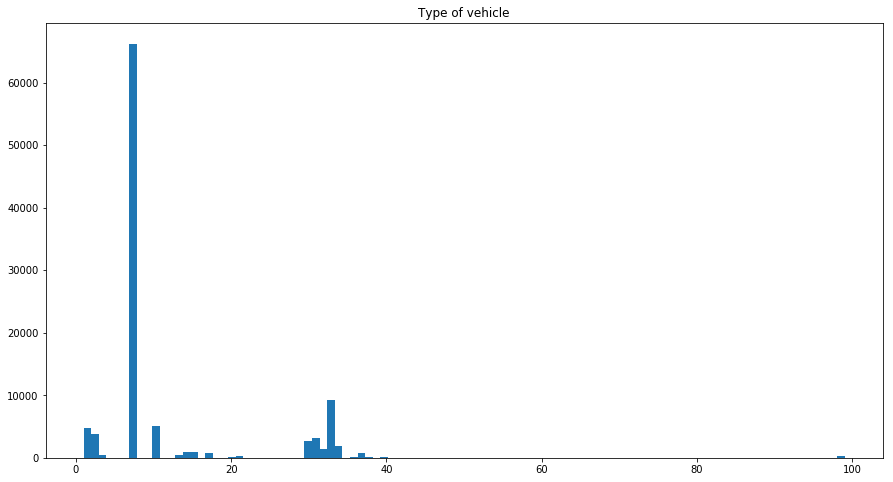

In [8]:
# Type of vehicle implied in the accident
plt.figure(figsize=(15,8))
plt.hist(veh['catv'], bins=100)
plt.title('Type of vehicle')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


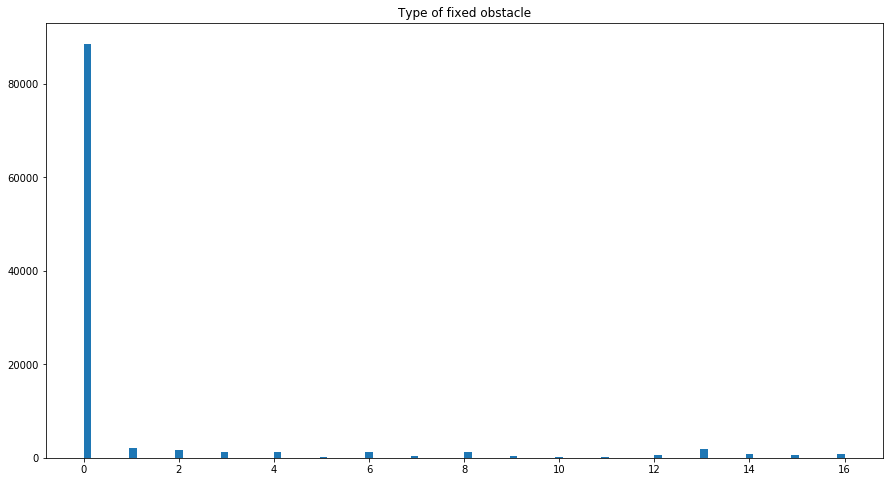

In [9]:
# Type of fixed obstacle implied in the accident
plt.figure(figsize=(15,8))
plt.hist(veh['obs'], bins=100)
plt.title('Type of fixed obstacle')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


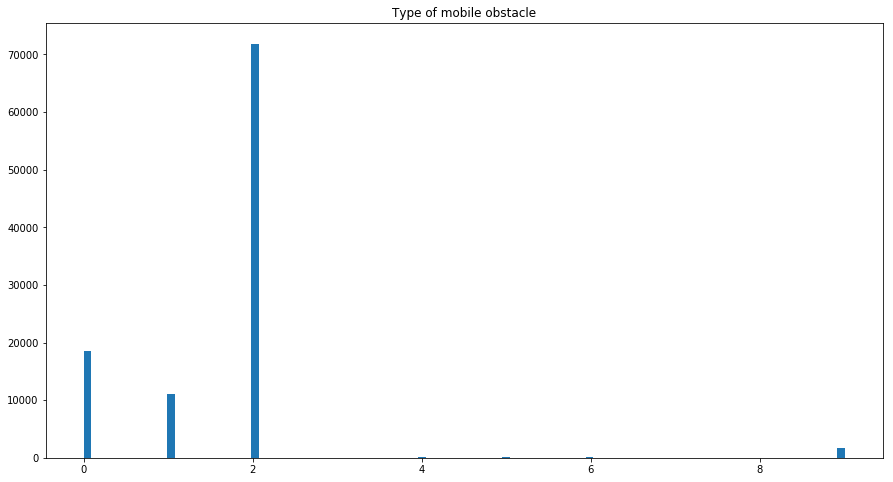

In [10]:
# Type of mobile obstacle implied in the accident
plt.figure(figsize=(15,8))
plt.hist(veh['obsm'], bins=100)
plt.title('Type of mobile obstacle')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


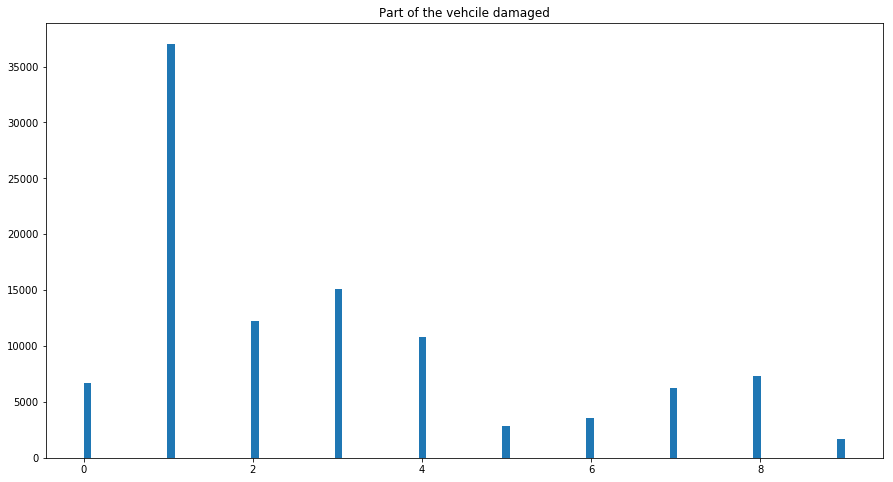

In [11]:
# Part of the vehicle damaged
plt.figure(figsize=(15,8))
plt.hist(veh['choc'], bins=100)
plt.title('Part of the vehcile damaged')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


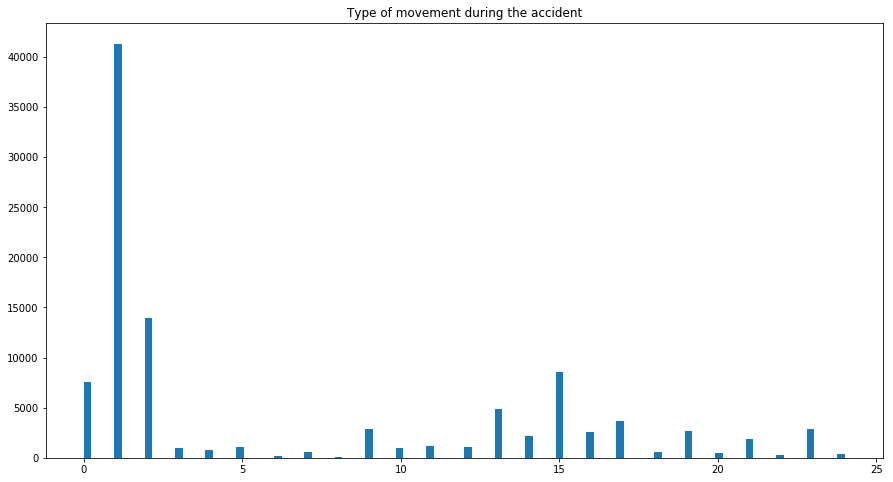

In [12]:
# Type of movement
plt.figure(figsize=(15,8))
plt.hist(veh['manv'], bins=100)
plt.title('Type of movement during the accident')
plt.show()

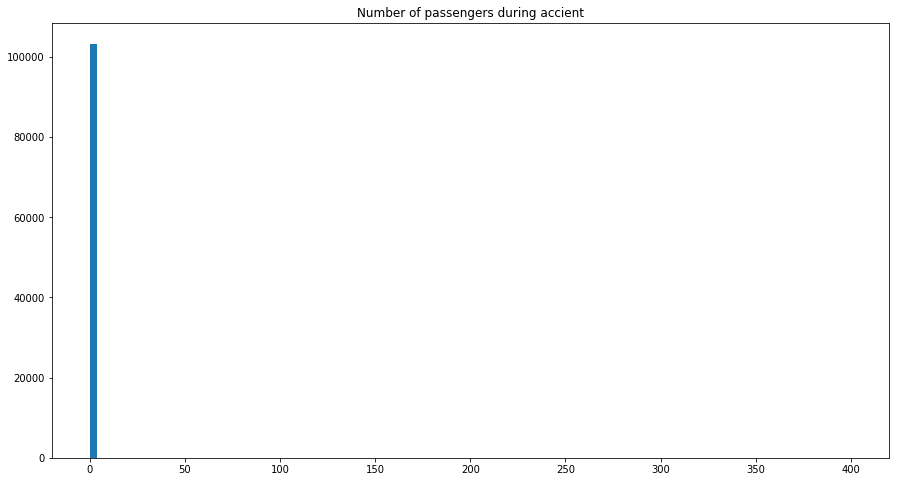

In [13]:
# Number of passengers
plt.figure(figsize=(15,8))
plt.hist(veh['occutc'], bins=100)
plt.title('Number of passengers during accient')
plt.show()

#### Further Data Visualization

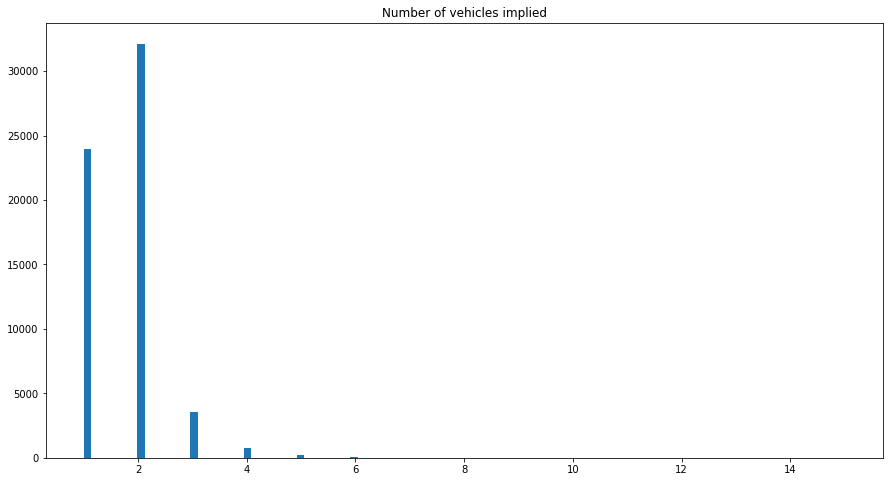

In [14]:
# Number of vehicles implied
veh['nb'] = 1

plt.figure(figsize=(15,8))
plt.hist(veh.groupby('Num_Acc').sum()['nb'], bins = 100)
plt.title('Number of vehicles implied')
plt.show()

## 2. Usagers

#### Descriptive statistics and distributions

In [15]:
usa.describe()

Num_Acc          place           catu           grav  \
count  1.360210e+05  124219.000000  136021.000000  136021.000000   
mean   2.017000e+11       1.430667       1.349814       2.492858   
std    1.756535e+04       1.284191       0.639996       1.330687   
min    2.017000e+11       1.000000       1.000000       1.000000   
25%    2.017000e+11       1.000000       1.000000       1.000000   
50%    2.017000e+11       1.000000       1.000000       3.000000   
75%    2.017000e+11       1.000000       2.000000       4.000000   
max    2.017001e+11       9.000000       4.000000       4.000000   

                sexe         trajet           secu           locp  \
count  136021.000000  136010.000000  127071.000000  135975.000000   
mean        1.323016       3.476266      17.843465       0.230579   
std         0.467631       2.647031      17.789299       0.871921   
min         1.000000       0.000000       1.000000       0.000000   
25%         1.000000       1.000000      11.000000       0.000000   
50%         1.000000       4.000000      11.000000       0.000000   
75%         2.000000       5.000000      21.000000       0.000000   
max         2.000000       9.000000      93.000000       8.000000   

                actp          etatp        an_nais  
count  135978.000000  135955.000000  135984.000000  
mean        0.281803       0.104748    1978.316795  
std         1.056138       0.378444      18.885641  
min         0.000000       0.000000    1914.000000  
25%         0.000000       0.000000    1965.000000  
50%         0.000000       0.000000    1982.000000  
75%         0.000000       0.000000    1993.000000  
max         9.000000       3.000000    2017.000000

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


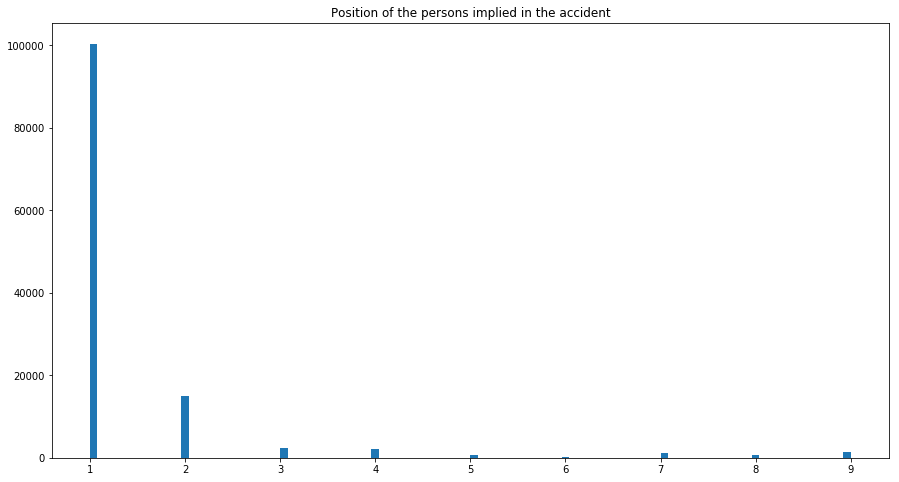

In [16]:
# Position of the persons implied in the accident within the vehicle
plt.figure(figsize=(15,8))
plt.hist(usa['place'], bins=100)
plt.title('Position of the persons implied in the accident')
plt.show()

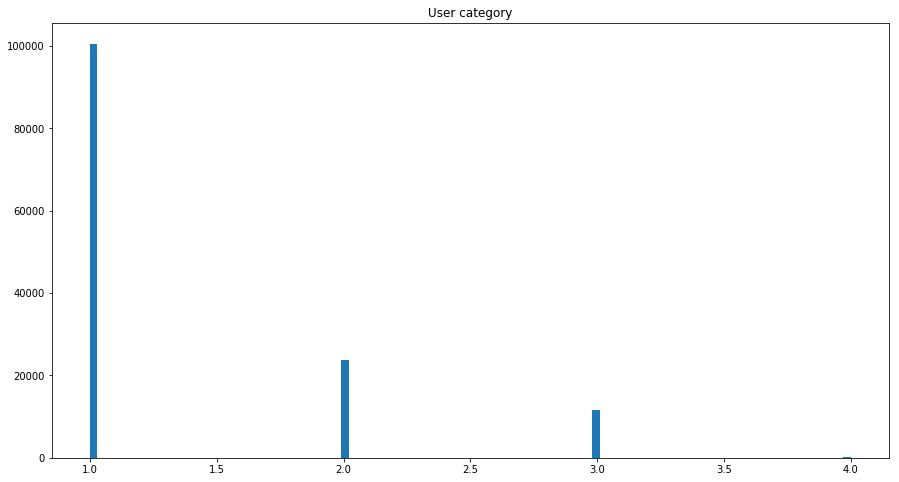

In [17]:
# User Category
plt.figure(figsize=(15,8))
plt.hist(usa['catu'], bins=100)
plt.title('User category')
plt.show()

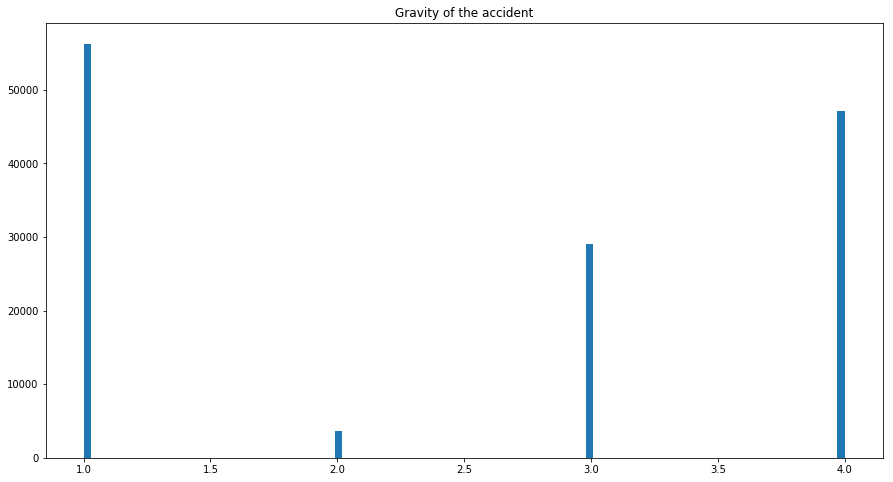

In [18]:
# Accident gravity
plt.figure(figsize=(15,8))
plt.hist(usa['grav'], bins=100)
plt.title('Gravity of the accident')
plt.show()

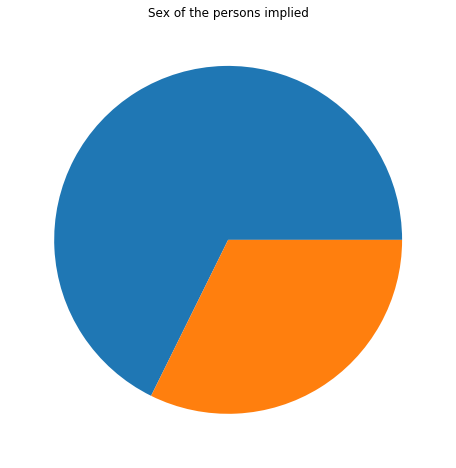

In [19]:
plt.figure(figsize=(15,8))
plt.pie(usa['sexe'].value_counts())
plt.title('Sex of the persons implied')
plt.show()

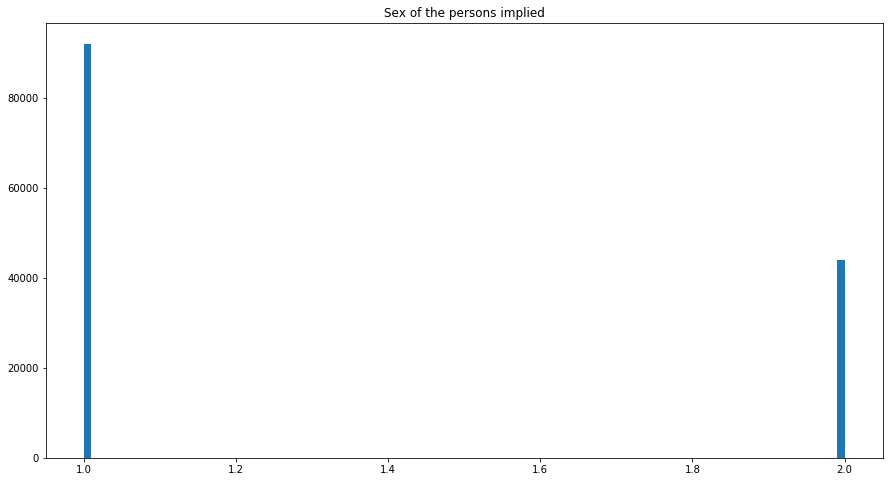

In [20]:
# Sex of persons implied
plt.figure(figsize=(15,8))
plt.hist(usa['sexe'], bins=100)
plt.title('Sex of the persons implied')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


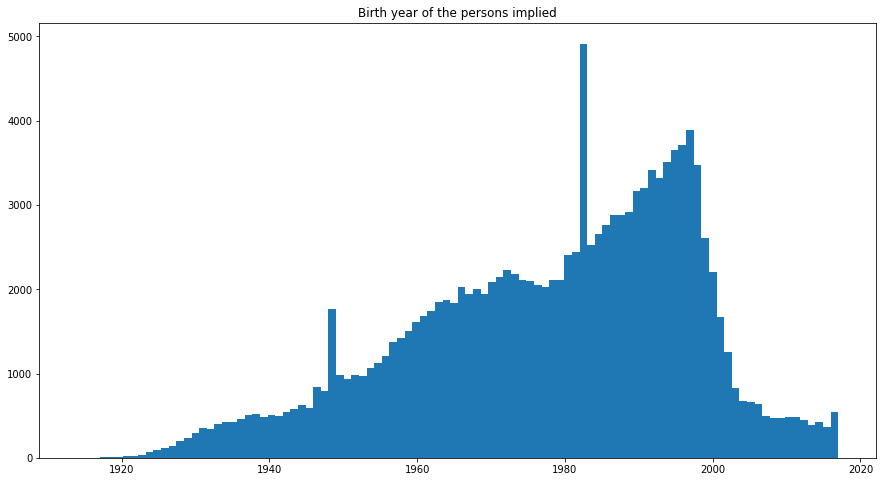

In [21]:
# Birth year
plt.figure(figsize=(15,8))
plt.hist(usa['an_nais'], bins=100)
plt.title('Birth year of the persons implied')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


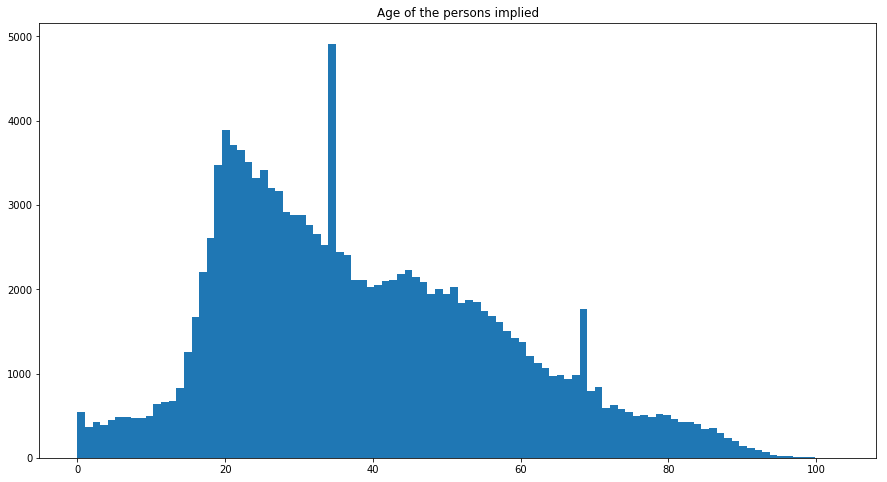

In [146]:
# Age of the persons implied
usa['age'] = 2017 - usa['an_nais']
plt.figure(figsize=(15,8))
plt.hist(usa['age'], bins=100)
plt.title('Age of the persons implied')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


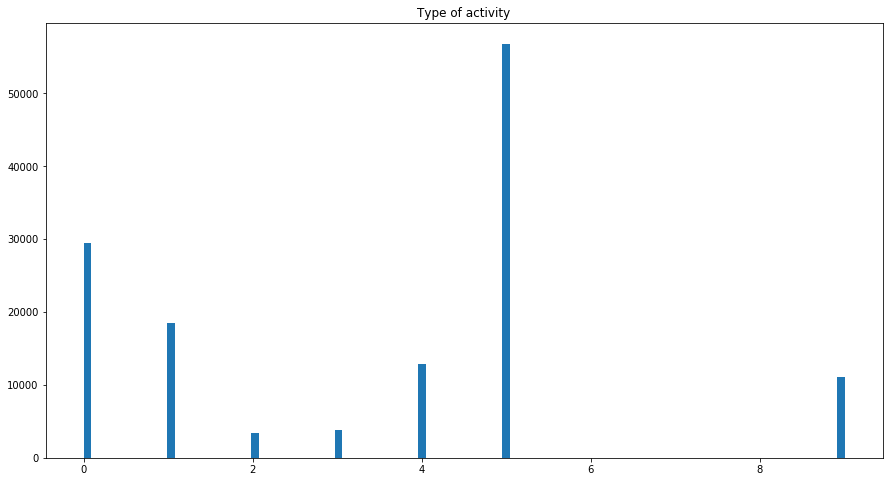

In [23]:
# Type of acitvity of the users
plt.figure(figsize=(15,8))
plt.hist(usa['trajet'], bins=100)
plt.title('Type of activity')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


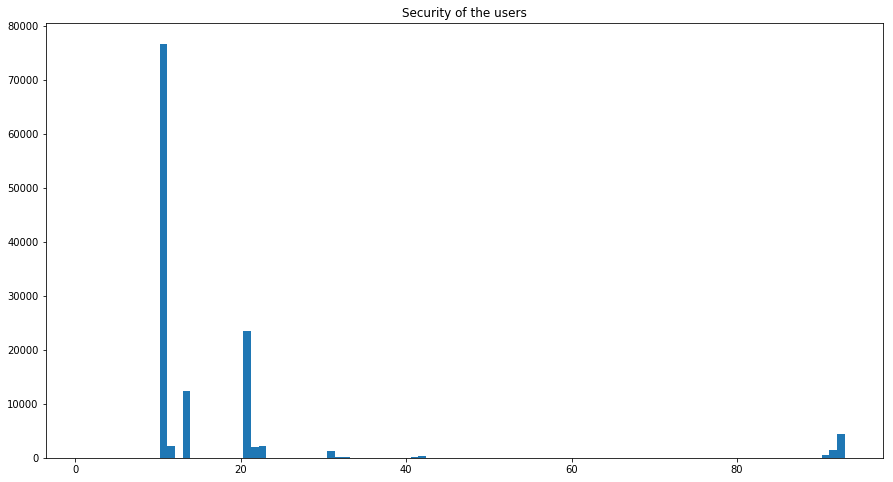

In [24]:
# Security of the users
plt.figure(figsize=(15,8))
plt.hist(usa['secu'], bins=100)
plt.title('Security of the users')
plt.show()

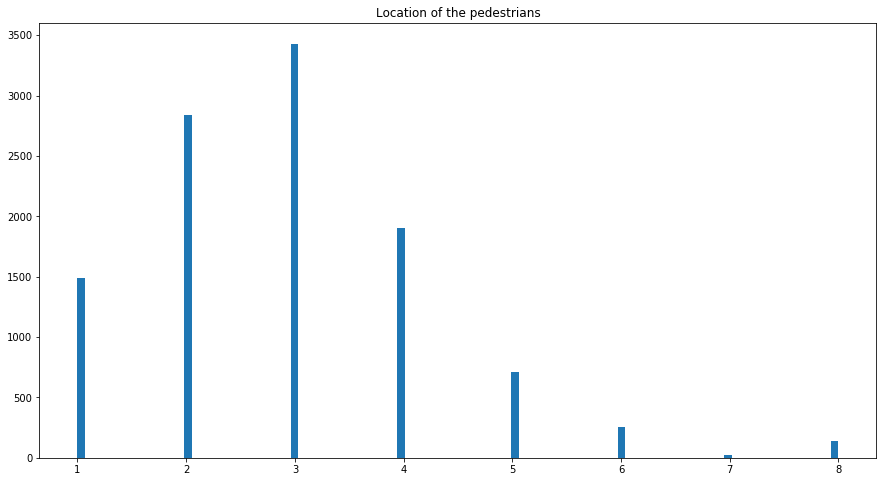

In [25]:
# Location of the pedestrians
plt.figure(figsize=(15,8))
plt.hist(usa[usa['locp']>0]['locp'], bins=100)
plt.title('Location of the pedestrians')
plt.show()

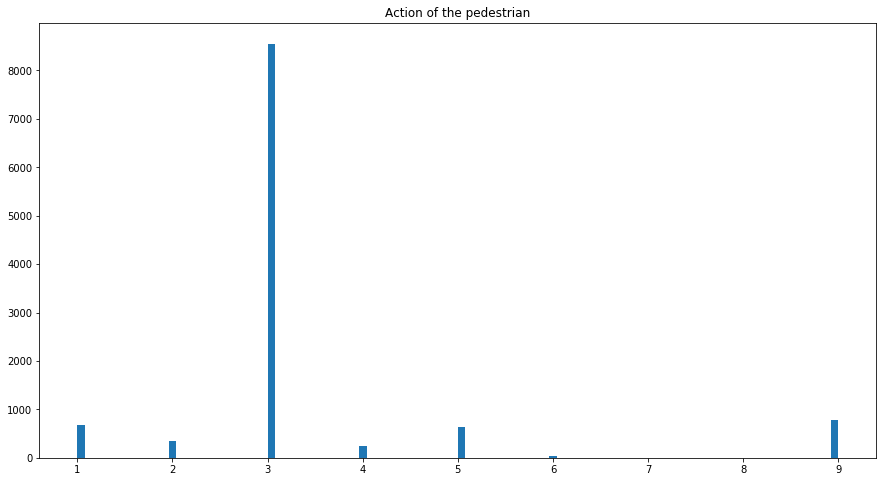

In [26]:
# Action of the pedestrian
plt.figure(figsize=(15,8))
plt.hist(usa[usa['actp']>0]['actp'], bins=100)
plt.title('Action of the pedestrian')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


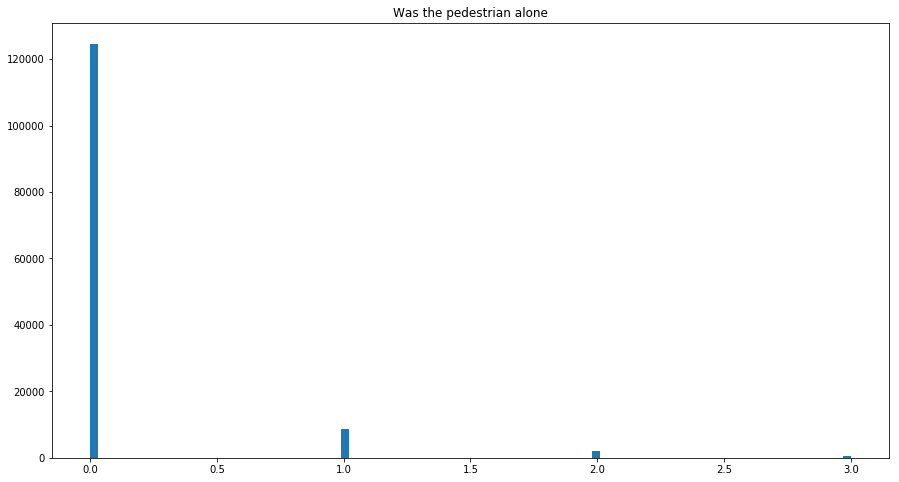

In [27]:
# Was the pedestrian alone ?
plt.figure(figsize=(15,8))
plt.hist(usa['etatp'], bins=100)
plt.title('Was the pedestrian alone')
plt.show()

## 3. Location

In [29]:
lie.describe()

Num_Acc          catr          v1          circ           nbv  \
count  6.070100e+04  60701.000000  408.000000  60330.000000  60267.000000   
mean   2.017000e+11      3.305053    2.071078      1.873794      2.188129   
std    1.752301e+04      1.150033    0.257271      0.711157      1.212107   
min    2.017000e+11      1.000000    2.000000      0.000000      0.000000   
25%    2.017000e+11      3.000000    2.000000      2.000000      2.000000   
50%    2.017000e+11      3.000000    2.000000      2.000000      2.000000   
75%    2.017000e+11      4.000000    2.000000      2.000000      2.000000   
max    2.017001e+11      9.000000    3.000000      4.000000     12.000000   

                 pr           pr1          vosp          prof          plan  \
count  26207.000000  25968.000000  60105.000000  60252.000000  59916.000000   
mean      32.450338    378.539818      0.132551      1.200242      1.130483   
std       80.542998    347.229141      0.558428      0.568886      0.765830   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        2.000000     37.000000      0.000000      1.000000      1.000000   
50%       11.000000    335.000000      0.000000      1.000000      1.000000   
75%       32.000000    625.000000      0.000000      1.000000      1.000000   
max     3965.000000   5540.000000      3.000000      4.000000      4.000000   

             lartpc       larrout          surf         infra          situ  \
count  58538.000000  58681.000000  60236.000000  57037.000000  57227.000000   
mean       6.416311     55.846032      1.259612      0.400126      1.206895   
std       37.138623     90.361392      0.941575      1.290739      0.816686   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      1.000000      0.000000      1.000000   
50%        0.000000     40.000000      1.000000      0.000000      1.000000   
75%        0.000000     72.000000      1.000000      0.000000      1.000000   
max      908.000000    999.000000      9.000000      7.000000      5.000000   

               env1  
count  56996.000000  
mean      63.563618  
std       47.301008  
min        0.000000  
25%        0.000000  
50%       99.000000  
75%       99.000000  
max       99.000000

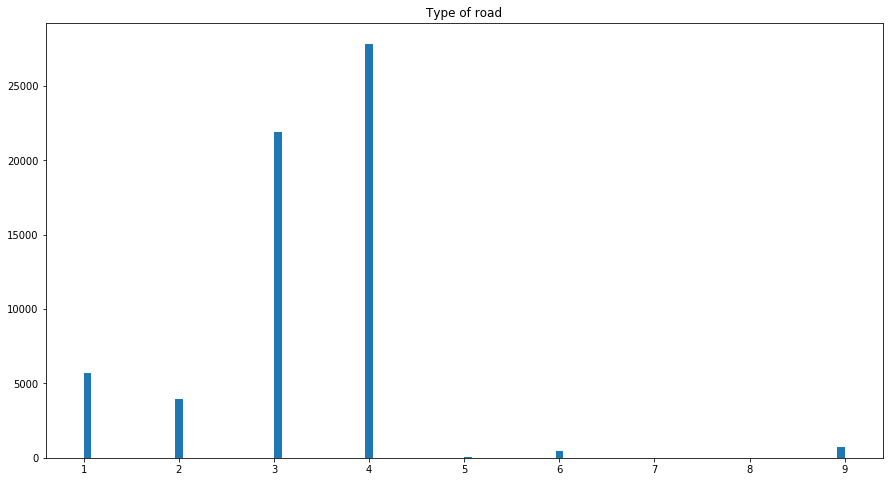

In [30]:
# Type of road
plt.figure(figsize=(15,8))
plt.hist(lie['catr'], bins=100)
plt.title('Type of road')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


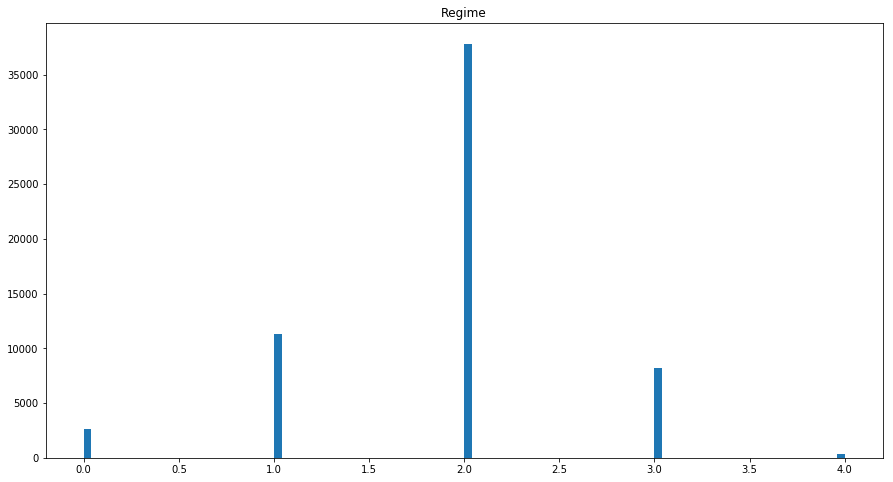

In [31]:
# Circulation Regime 
plt.figure(figsize=(15,8))
plt.hist(lie['circ'], bins=100)
plt.title('Regime')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


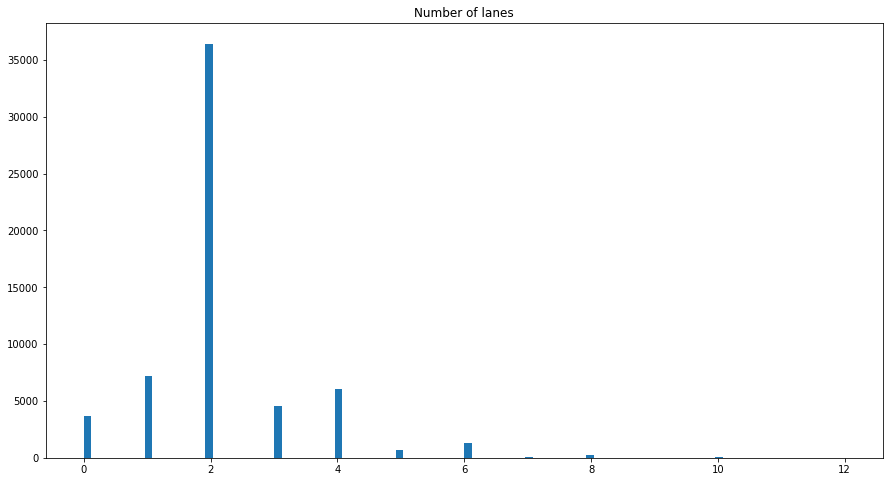

In [32]:
# Number of lanes
plt.figure(figsize=(15,8))
plt.hist(lie['nbv'], bins=100)
plt.title('Number of lanes')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


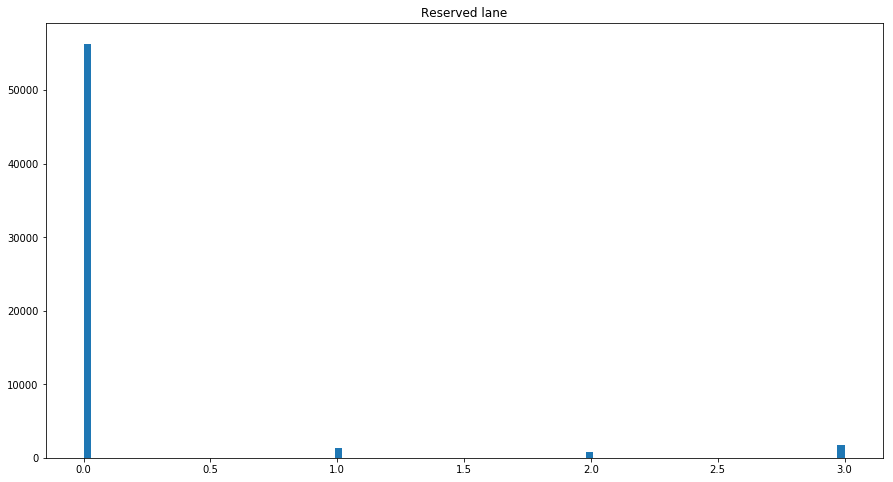

In [33]:
# Reserved lane
plt.figure(figsize=(15,8))
plt.hist(lie['vosp'], bins=100)
plt.title('Reserved lane')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


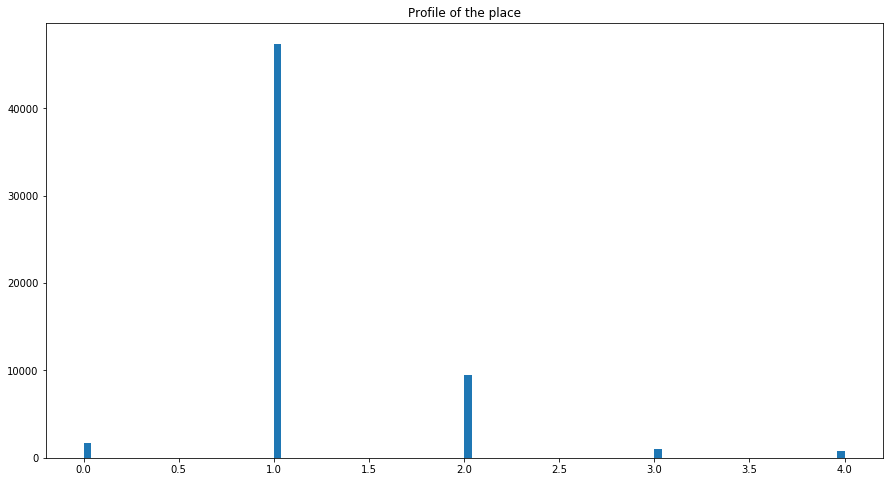

In [34]:
# Profile of the place
plt.figure(figsize=(15,8))
plt.hist(lie['prof'], bins=100)
plt.title('Profile of the place')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


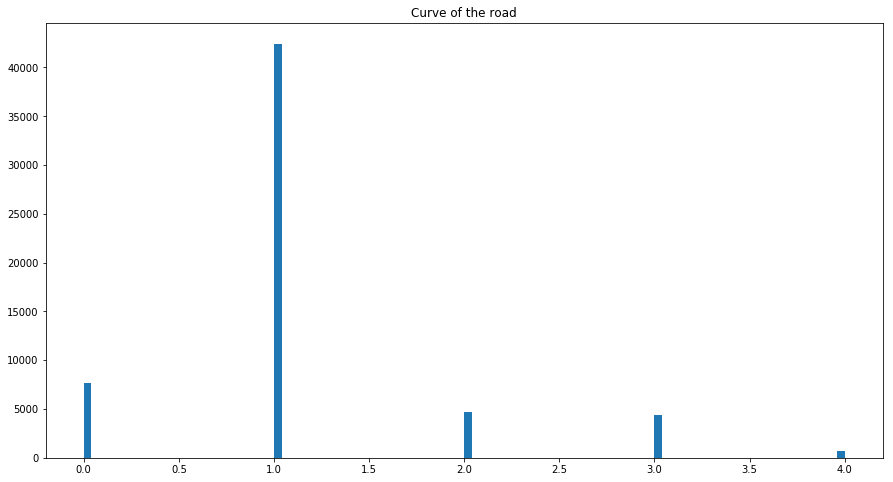

In [35]:
# Curve of the road
plt.figure(figsize=(15,8))
plt.hist(lie['plan'], bins=100)
plt.title('Curve of the road')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


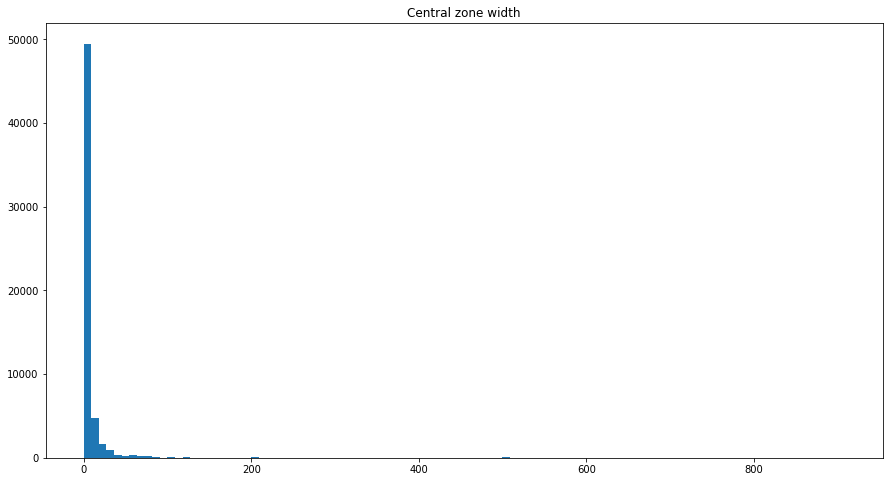

In [36]:
# Curve of the road
plt.figure(figsize=(15,8))
plt.hist(lie['lartpc'], bins=100)
plt.title('Central zone width')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


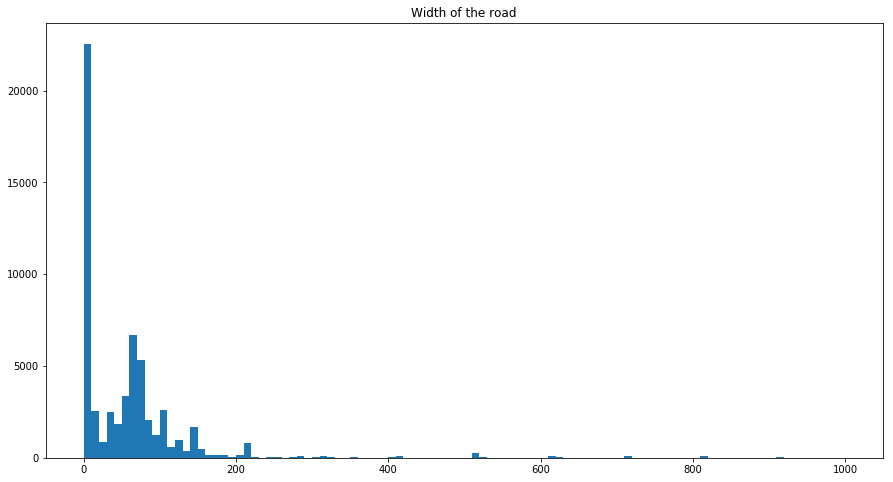

In [37]:
# Width of the road
plt.figure(figsize=(15,8))
plt.hist(lie['larrout'], bins=100)
plt.title('Width of the road')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


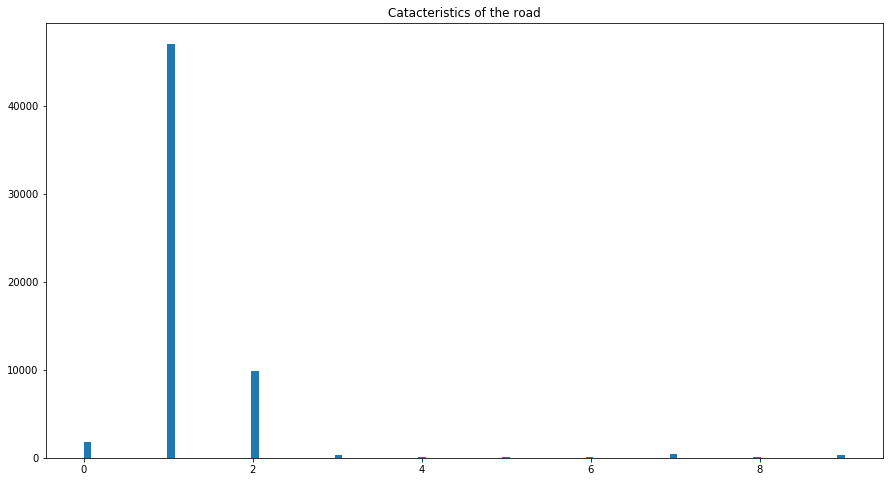

In [38]:
# Catacteristics of the road
plt.figure(figsize=(15,8))
plt.hist(lie['surf'], bins=100)
plt.title('Catacteristics of the road')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


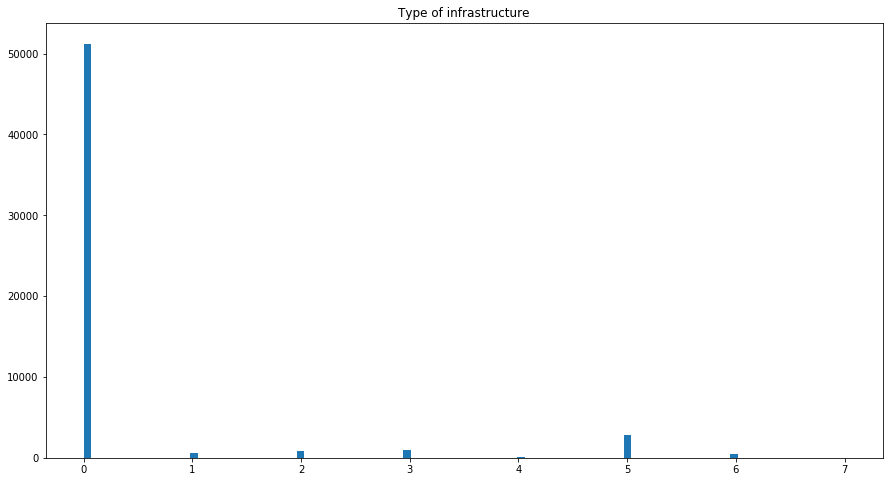

In [39]:
# Type of infrastructure
plt.figure(figsize=(15,8))
plt.hist(lie['infra'], bins=100)
plt.title('Type of infrastructure')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


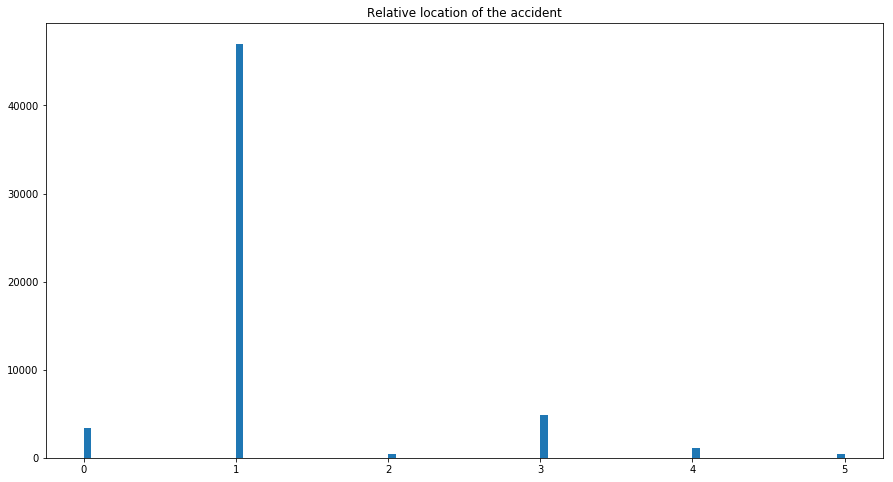

In [40]:
# Relative location of the accident
plt.figure(figsize=(15,8))
plt.hist(lie['situ'], bins=100)
plt.title('Relative location of the accident')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


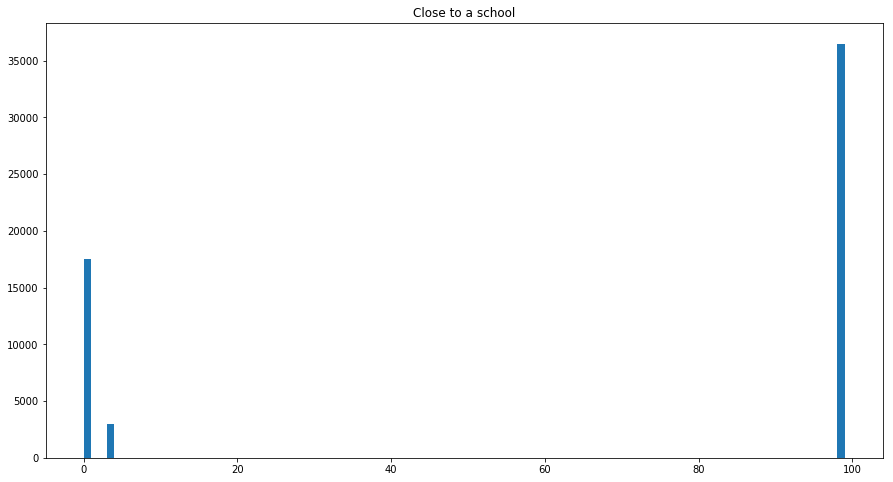

In [41]:
# Close to a school
plt.figure(figsize=(15,8))
plt.hist(lie['env1'], bins=100)
plt.title('Close to a school')
plt.show()

## 4. Caracteristics

In [42]:
car.describe()

Num_Acc       an          mois          jour          hrmn  \
count  6.070100e+04  60701.0  60701.000000  60701.000000  60701.000000   
mean   2.017000e+11     17.0      6.611440     15.681801   1376.120789   
std    1.752301e+04      0.0      3.377904      8.713820    546.792301   
min    2.017000e+11     17.0      1.000000      1.000000      1.000000   
25%    2.017000e+11     17.0      4.000000      8.000000    950.000000   
50%    2.017000e+11     17.0      7.000000     16.000000   1447.000000   
75%    2.017000e+11     17.0     10.000000     23.000000   1810.000000   
max    2.017001e+11     17.0     12.000000     31.000000   2359.000000   

                lum           agg           int           atm           col  \
count  60701.000000  60701.000000  60701.000000  60688.000000  60695.000000   
mean       1.906641      1.633647      1.842803      1.573095      4.205569   
std        1.484794      0.481812      1.705607      1.620940      1.944878   
min        1.000000      1.000000      0.000000      1.000000      1.000000   
25%        1.000000      1.000000      1.000000      1.000000      3.000000   
50%        1.000000      2.000000      1.000000      1.000000      4.000000   
75%        3.000000      2.000000      2.000000      1.000000      6.000000   
max        5.000000      2.000000      9.000000      9.000000      7.000000   

                com           lat          long           dep  
count  60701.000000  5.297000e+04  5.297000e+04  60701.000000  
mean     190.917135  4.627474e+06  3.783177e+05    577.838009  
std      169.681420  5.178041e+05  7.857263e+05    294.778372  
min        1.000000  4.340910e+05 -4.770980e+05     10.000000  
25%       57.000000  4.481995e+06  1.393180e+05    330.000000  
50%      119.000000  4.766188e+06  2.396575e+05    660.000000  
75%      285.000000  4.884970e+06  4.897015e+05    830.000000  
max      907.000000  5.107423e+06  6.179073e+06    976.000000

In [43]:
car['date'] = pd.to_datetime(car['jour'].astype(str) + '-' + car['mois'].astype(str) + '-20' +car['an'].astype(str))

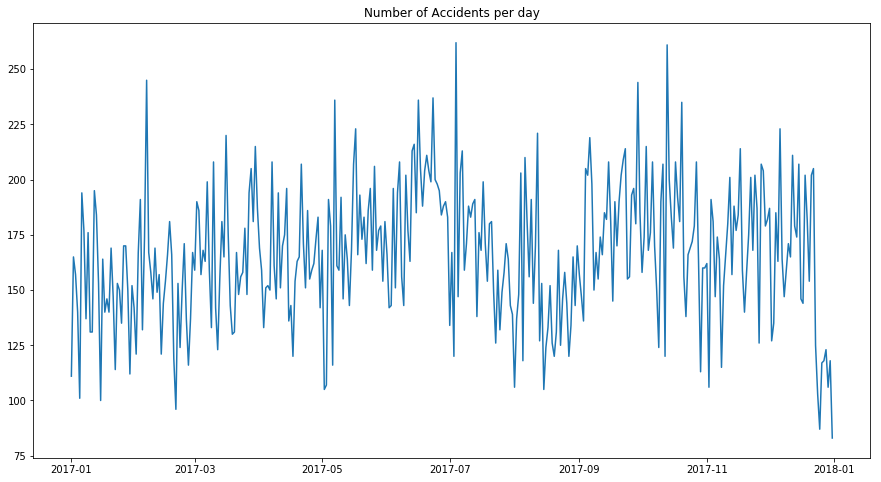

In [44]:
car['qty'] = 1

plt.figure(figsize=(15,8))
plt.plot(car.groupby('date').sum()['qty'])
plt.title('Number of Accidents per day')
plt.show()

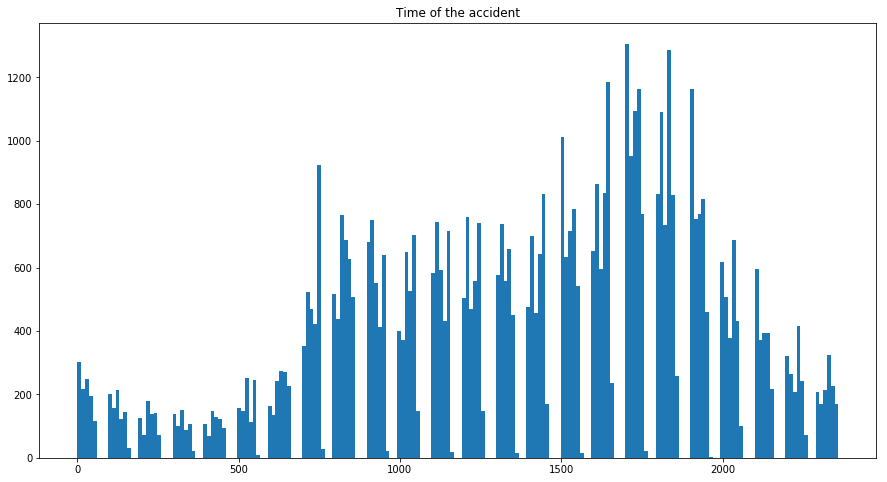

In [45]:
# Time of the accident
plt.figure(figsize=(15,8))
plt.hist(car['hrmn'], bins=200)
plt.title('Time of the accident')
plt.show()

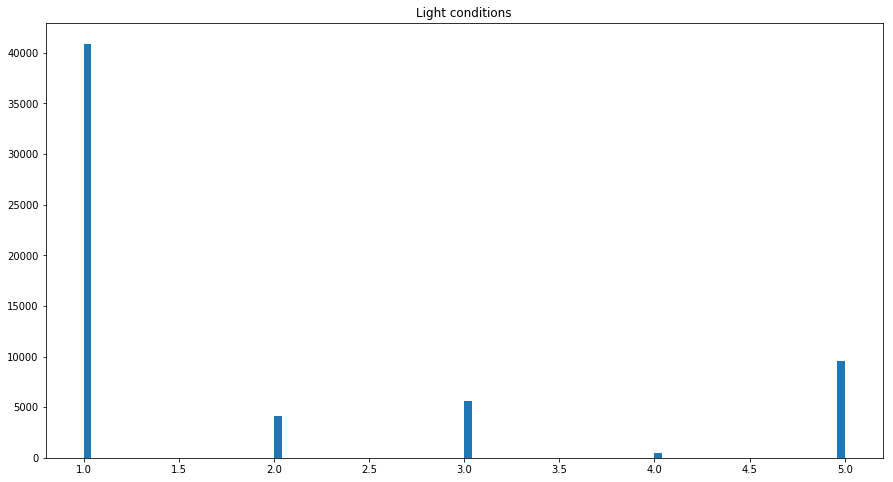

In [46]:
# Light conditions
plt.figure(figsize=(15,8))
plt.hist(car['lum'], bins=100)
plt.title('Light conditions')
plt.show()

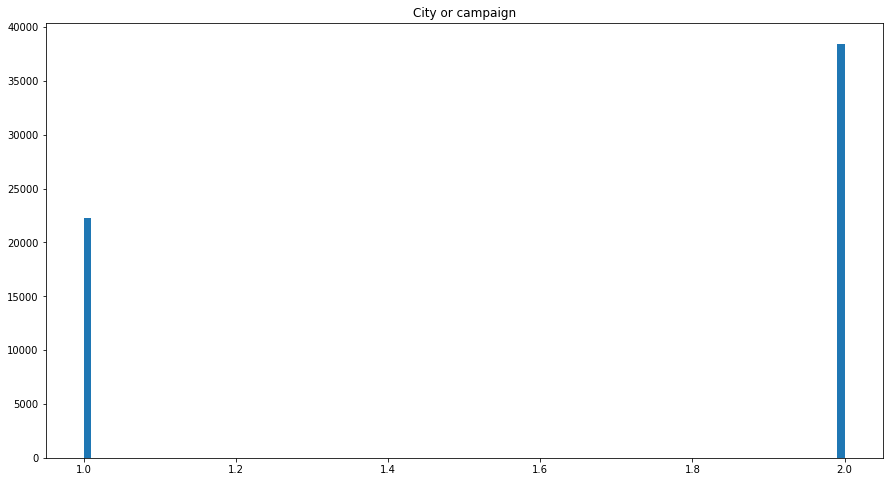

In [47]:
# In the City
plt.figure(figsize=(15,8))
plt.hist(car['agg'], bins=100)
plt.title('City or campaign')
plt.show()

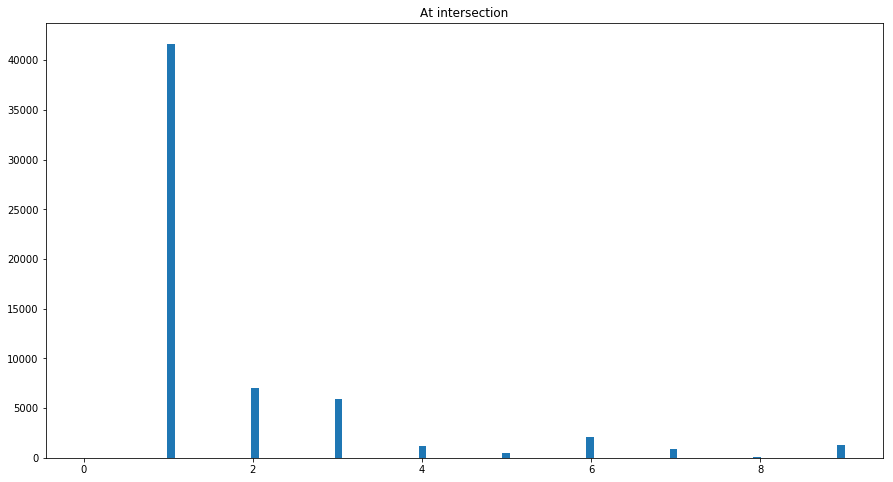

In [48]:
# At intersection
plt.figure(figsize=(15,8))
plt.hist(car['int'], bins=100)
plt.title('At intersection')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


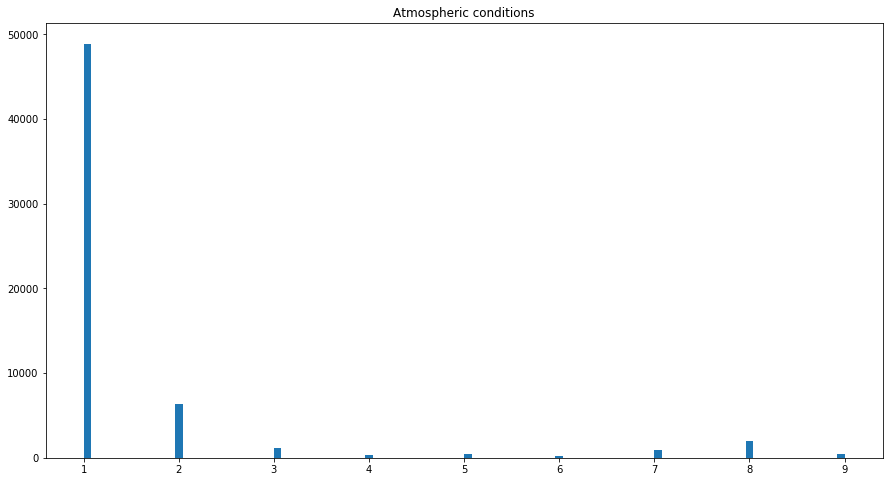

In [49]:
# Atmospheric condition
plt.figure(figsize=(15,8))
plt.hist(car['atm'], bins=100)
plt.title('Atmospheric conditions')
plt.show()

/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/anaconda3/lib/python3.6/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


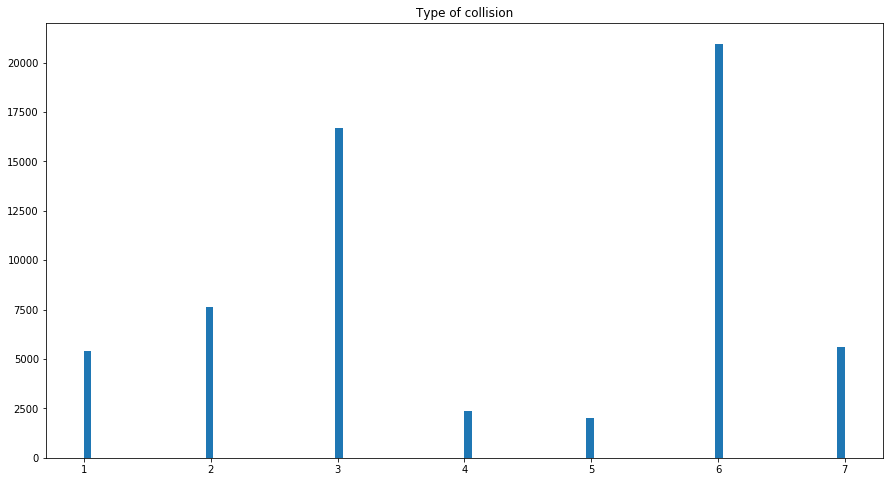

In [50]:
# Type of collision
plt.figure(figsize=(15,8))
plt.hist(car['col'], bins=100)
plt.title('Type of collision')
plt.show()

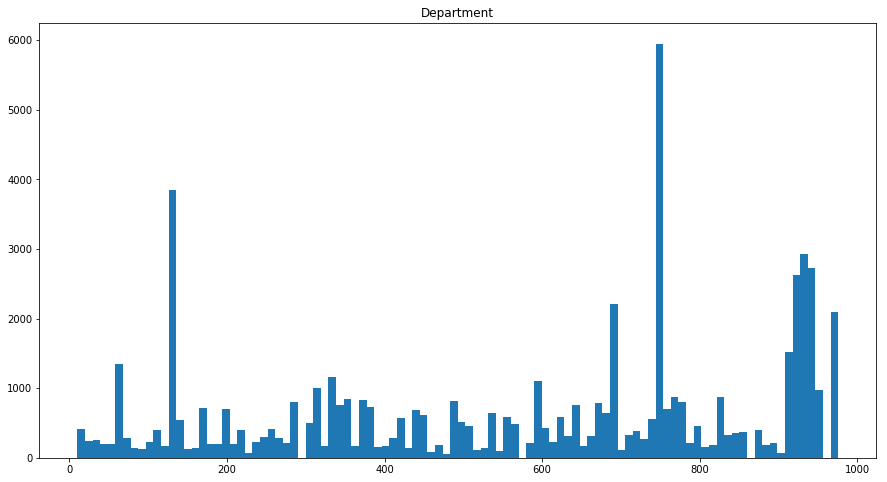

In [51]:
# Department
plt.figure(figsize=(15,8))
plt.hist(car['dep'], bins=100)
plt.title('Department')
plt.show()

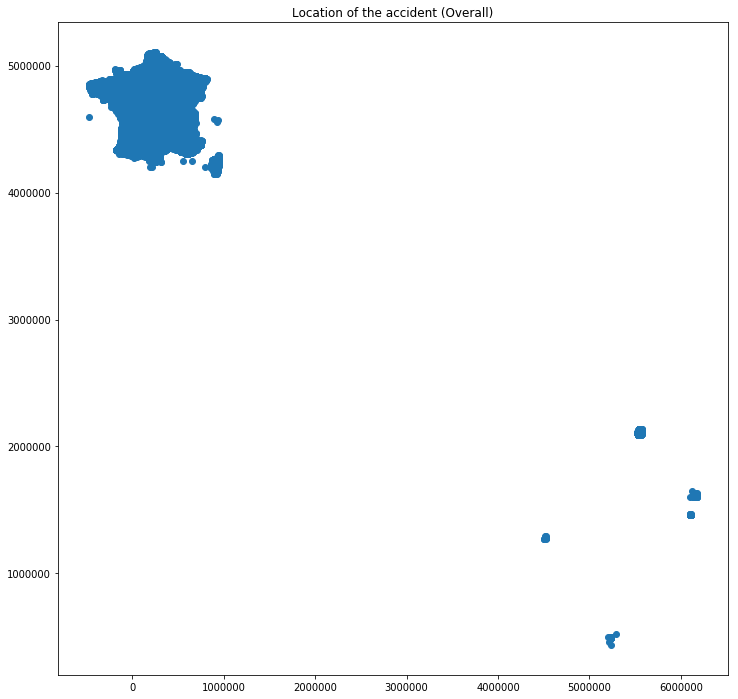

In [57]:
# Accident location
plt.figure(figsize=(12,12))
plt.scatter(car['long'], car['lat'])
plt.title('Location of the accident (Overall)')
plt.show()

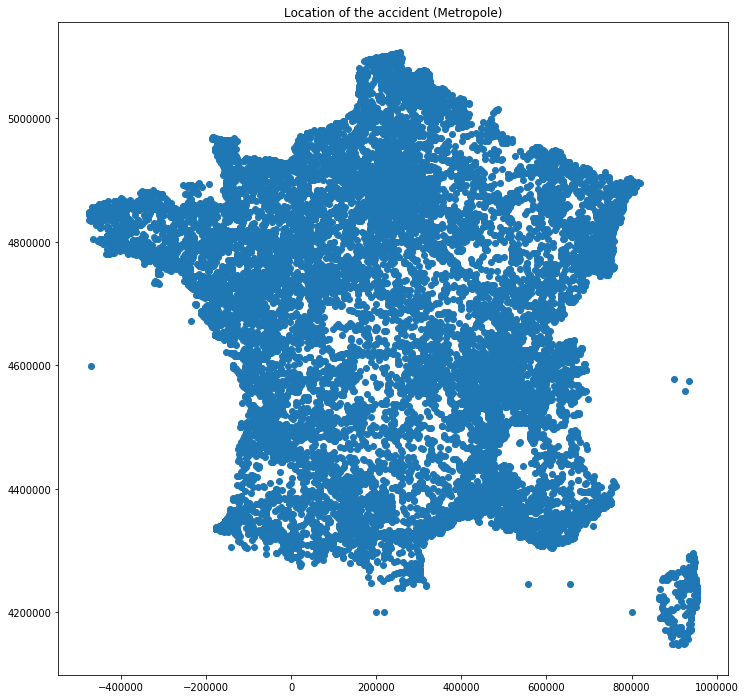

In [70]:
# Accident location
car_met = car[car['long']<2000000]
plt.figure(figsize=(12,12))
plt.scatter(car_met['long'], car_met['lat'])
plt.title('Location of the accident (Metropole)')
plt.show()

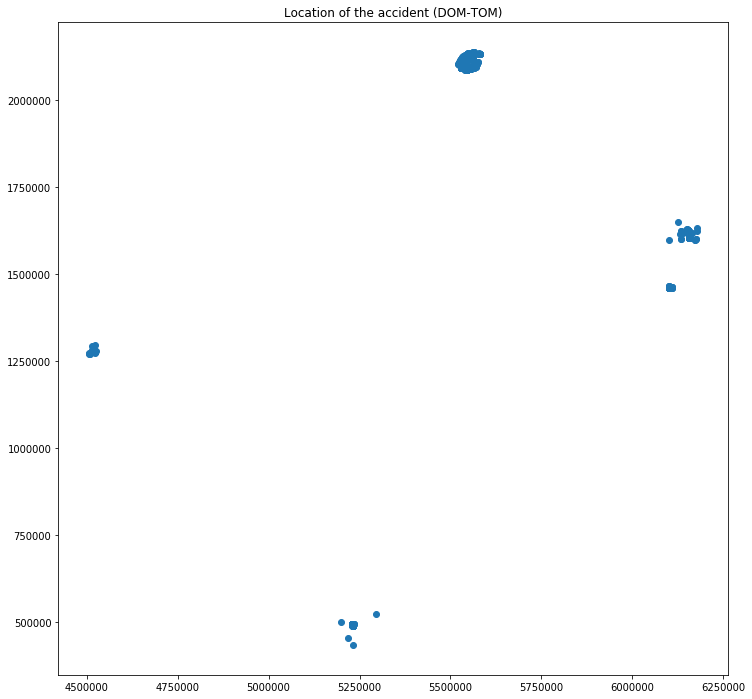

In [68]:
# Accident location
car_met = car[car['long']>4000000]
plt.figure(figsize=(12,12))
plt.scatter(car_met['long'], car_met['lat'])
plt.title('Location of the accident (DOM-TOM)')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


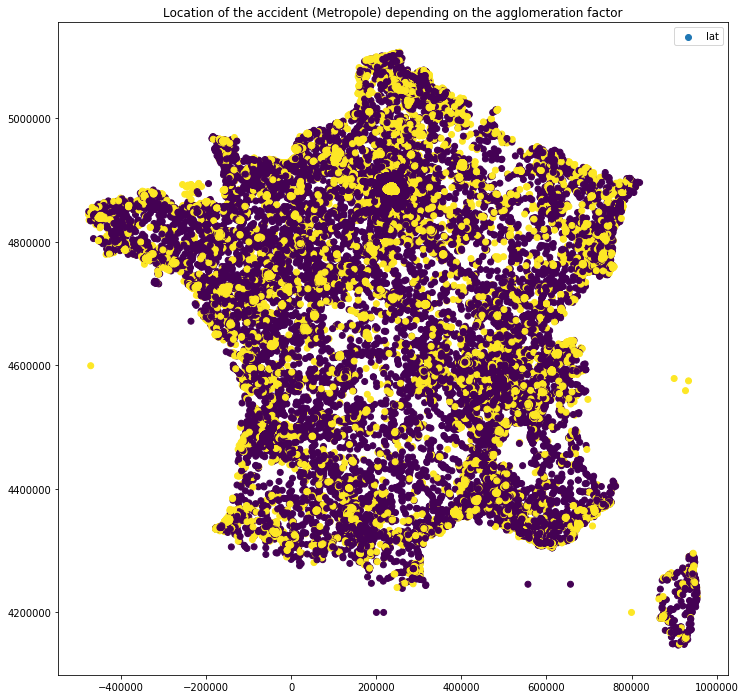

In [84]:
# Accident location, depending on agglomeration
plt.figure(figsize=(12,12))
plt.scatter(car_met['long'], car_met['lat'], c=set_color(car_met, 'agg'))
plt.title('Location of the accident (Metropole) depending on the agglomeration factor')
plt.show()

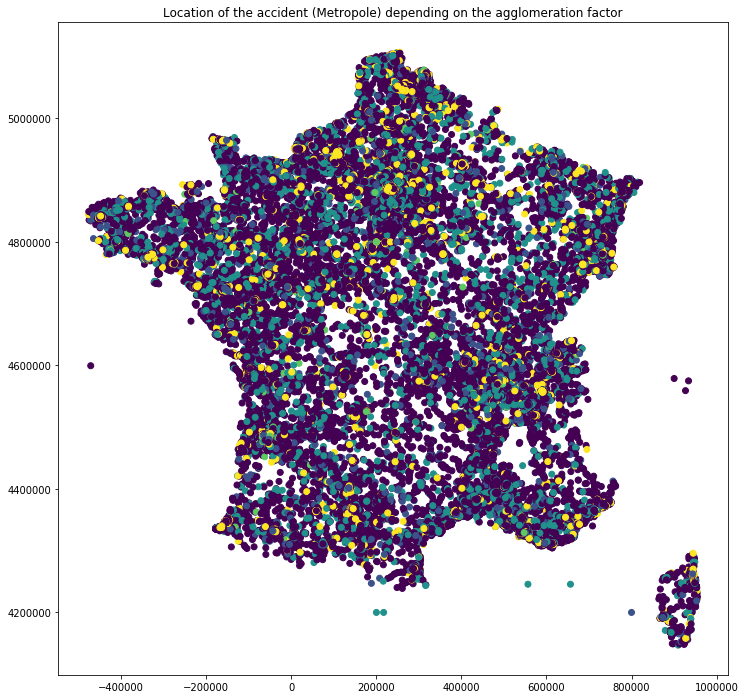

In [85]:
# Accident location, depending on light conditions
plt.figure(figsize=(12,12))
plt.scatter(car_met['long'], car_met['lat'], c=set_color(car_met, 'lum'))
plt.title('Location of the accident (Metropole) depending on light conditions')
plt.show()

In [90]:
car_met['atm'] = car_met['atm'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


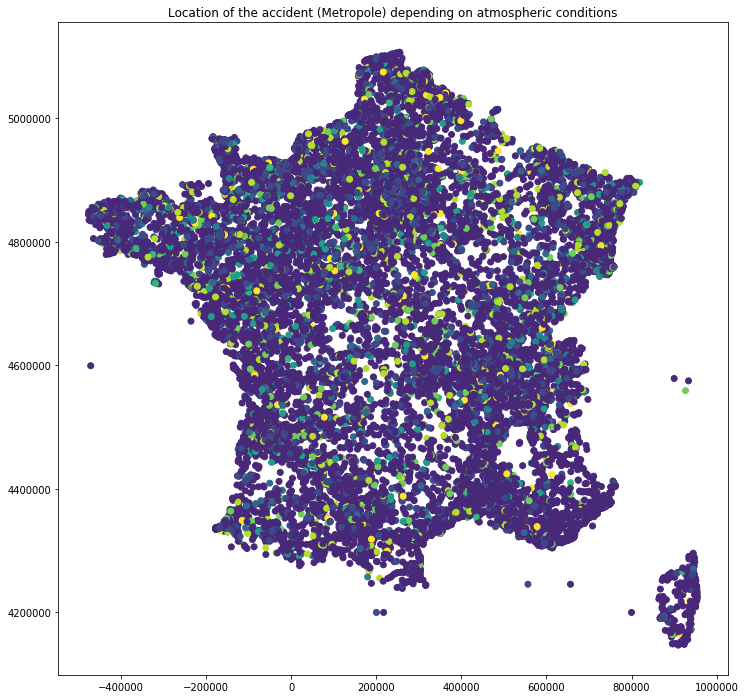

In [91]:
# Accident location, depending on atmospheric conditions
plt.figure(figsize=(12,12))
plt.scatter(car_met['long'], car_met['lat'], c=set_color(car_met, 'atm'))
plt.title('Location of the accident (Metropole) depending on atmospheric conditions')
plt.show()

In [95]:
car_met['col'] = car_met['col'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


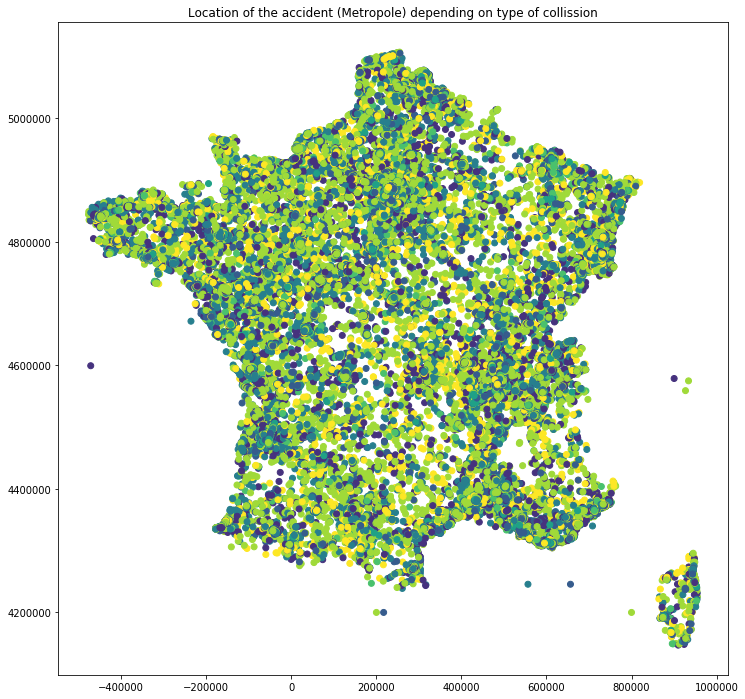

In [96]:
# Accident location, depending on type of collision
plt.figure(figsize=(12,12))
plt.scatter(car_met['long'], car_met['lat'], c=set_color(car_met, 'col'))
plt.title('Location of the accident (Metropole) depending on type of collission')
plt.show()

## 5. Mix Caracteristic and Location

In [114]:
car_loc = pd.concat([lie, car], axis=1)
car_loc_met = car_loc[car_loc['long']<2000000]

In [120]:
car_loc_met['env1'] = car_loc_met['env1'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


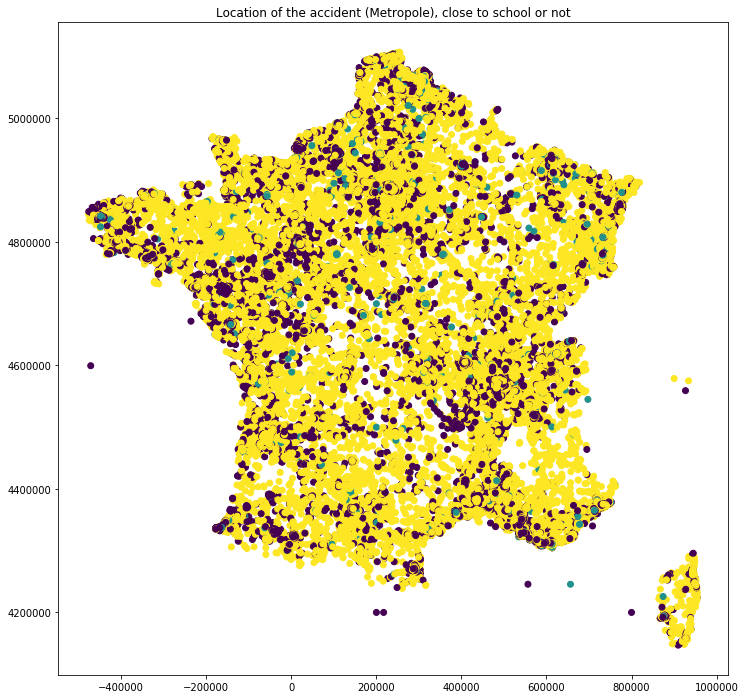

In [122]:
# Accident location, close to school
plt.figure(figsize=(12,12))
plt.scatter(car_loc_met['long'], car_loc_met['lat'], c=set_color(car_loc_met, 'env1'))
plt.title('Location of the accident (Metropole), close to school or not')
plt.show()

In [124]:
car_loc_met['larrout'] = car_loc_met['larrout'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


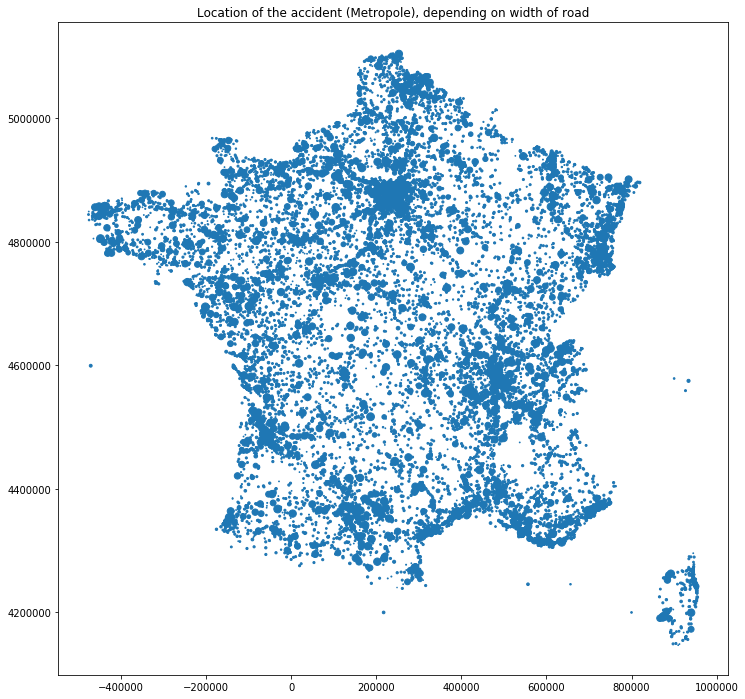

In [132]:
# Accident location depending on road width
plt.figure(figsize=(12,12))
plt.scatter(car_loc_met['long'], car_loc_met['lat'], car_loc_met['larrout']/15)
plt.title('Location of the accident (Metropole), depending on width of road')
plt.show()

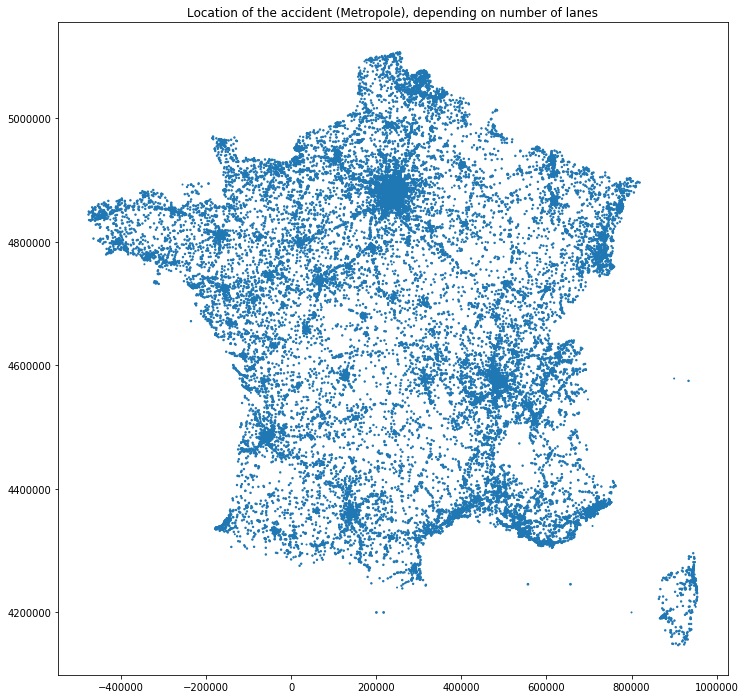

In [131]:
# Accident location depending on number of lanes
plt.figure(figsize=(12,12))
plt.scatter(car_loc_met['long'], car_loc_met['lat'], car_loc_met['nbv'])
plt.title('Location of the accident (Metropole), depending on number of lanes')
plt.show()

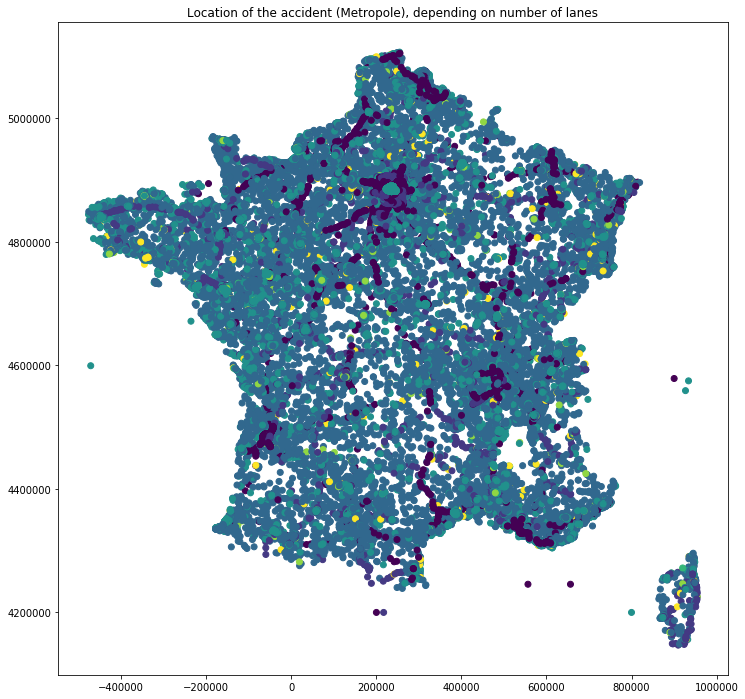

In [134]:
# Accident location depending on type of road
plt.figure(figsize=(12,12))
plt.scatter(car_loc_met['long'], car_loc_met['lat'], c=set_color(car_loc_met, 'catr'))
plt.title('Location of the accident (Metropole), depending on type of road')
plt.show()

In [136]:
car_loc_met['circ'] = car_loc_met['circ'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


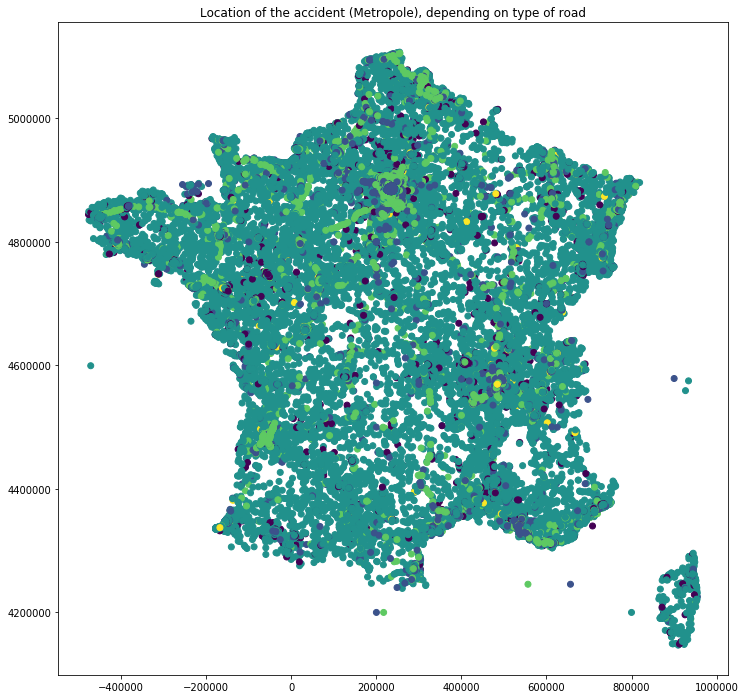

In [137]:
plt.figure(figsize=(12,12))
plt.scatter(car_loc_met['long'], car_loc_met['lat'], c=set_color(car_loc_met, 'circ'))
plt.title('Location of the accident (Metropole), depending on type of road')
plt.show()

## 6. Mix Vehicule and Caracteristics

In [148]:
veh_car = pd.merge(veh, car, on='Num_Acc')
veh_car_met = veh_car[veh_car['long']<2000000]

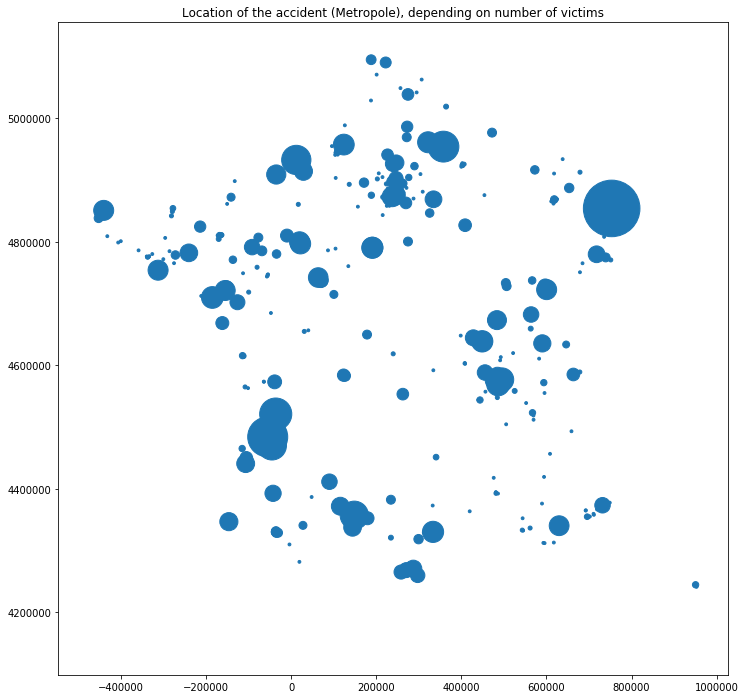

In [151]:
# Number of victims
plt.figure(figsize=(12,12))
plt.scatter(veh_car_met['long'], veh_car_met['lat'], veh_car_met['occutc']*8)
plt.title('Location of the accident (Metropole), depending on number of victims')
plt.show()

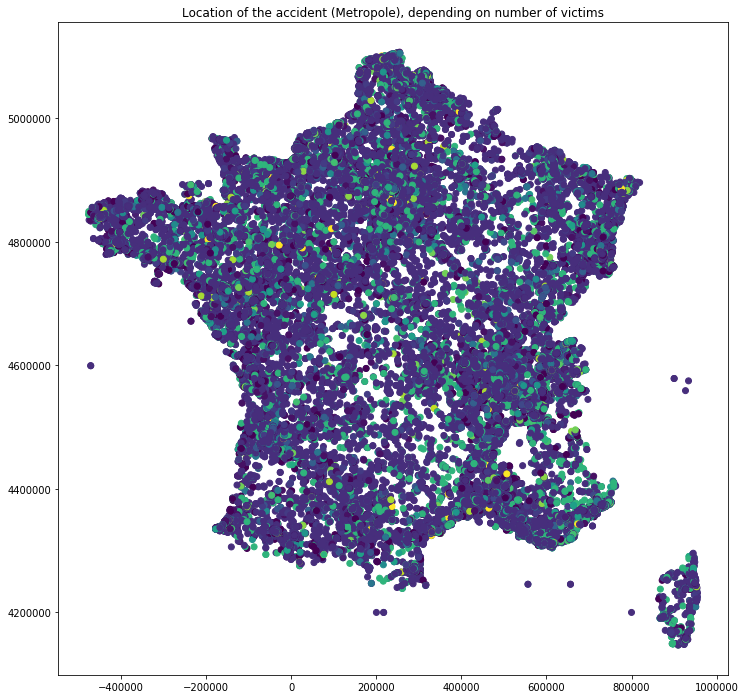

In [152]:
# Vehicle Category
plt.figure(figsize=(12,12))
plt.scatter(veh_car_met['long'], veh_car_met['lat'], c=set_color(veh_car_met, 'catv'))
plt.title('Location of the accident (Metropole), depending on vehicle category')
plt.show()

In [154]:
veh_car_met['choc'] = veh_car_met['choc'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


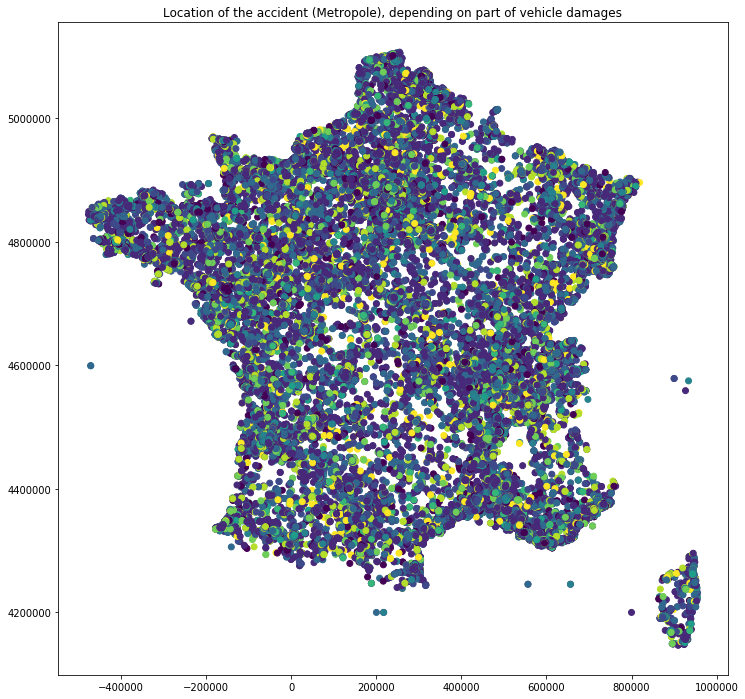

In [155]:
# Part of vehicle damaged
plt.figure(figsize=(12,12))
plt.scatter(veh_car_met['long'], veh_car_met['lat'], c=set_color(veh_car_met, 'choc'))
plt.title('Location of the accident (Metropole), depending on part of vehicle damages')
plt.show()

In [159]:
veh_car_met['obsm'] = veh_car_met['obsm'].fillna(0)
veh_car_met['obs'] = veh_car_met['obs'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


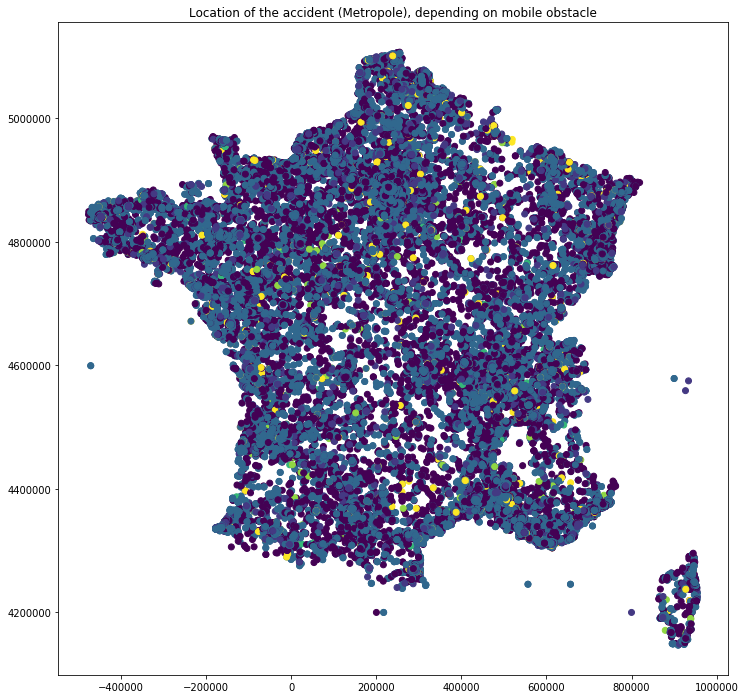

In [158]:
# Mobile obstacle
plt.figure(figsize=(12,12))
plt.scatter(veh_car_met['long'], veh_car_met['lat'], c=set_color(veh_car_met, 'obsm'))
plt.title('Location of the accident (Metropole), depending on mobile obstacle')
plt.show()

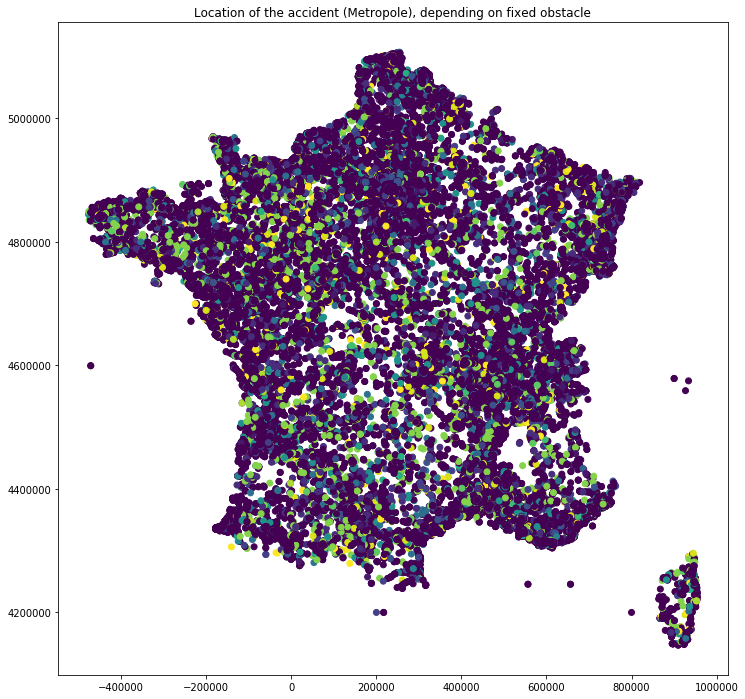

In [161]:
# Fixed obstacle
plt.figure(figsize=(12,12))
plt.scatter(veh_car_met['long'], veh_car_met['lat'], c=set_color(veh_car_met, 'obs'))
plt.title('Location of the accident (Metropole), depending on fixed obstacle')
plt.show()

## 7. Mixing Users and Caracteristics

In [162]:
usa_car = pd.merge(usa, car, on='Num_Acc')
usa_car_met = usa_car[usa_car['long']<2000000]

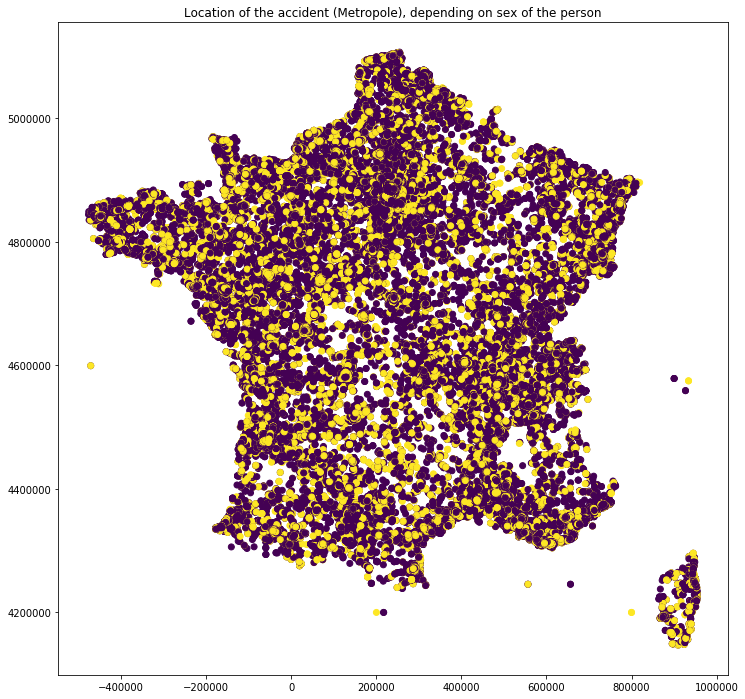

In [164]:
# Sex of the person
plt.figure(figsize=(12,12))
plt.scatter(usa_car_met['long'], usa_car_met['lat'], c=set_color(usa_car_met, 'sexe'))
plt.title('Location of the accident (Metropole), depending on sex of the person')
plt.show()

In [167]:
usa_car_met['age'] = usa_car_met['age'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


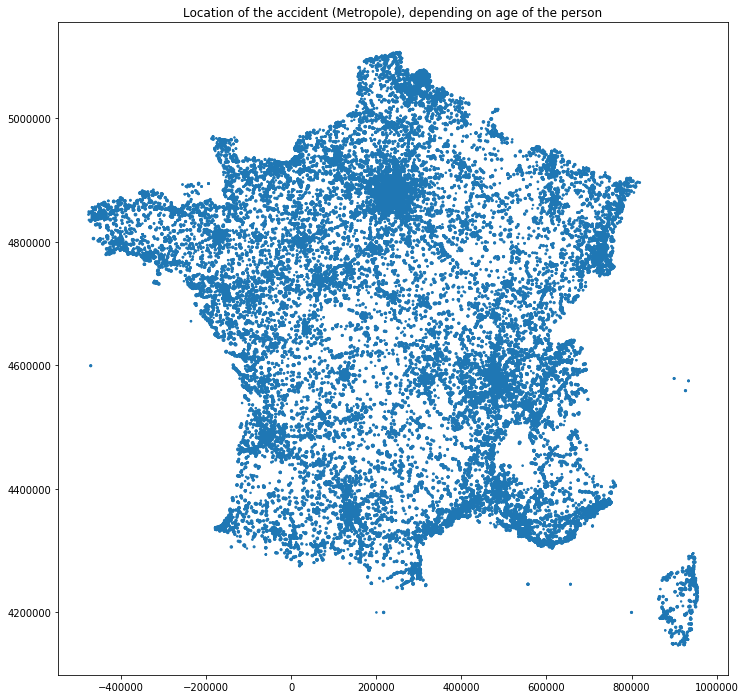

In [170]:
# Age of the person
plt.figure(figsize=(12,12))
plt.scatter(usa_car_met['long'], usa_car_met['lat'], usa_car_met['age']/10)
plt.title('Location of the accident (Metropole), depending on age of the person')
plt.show()

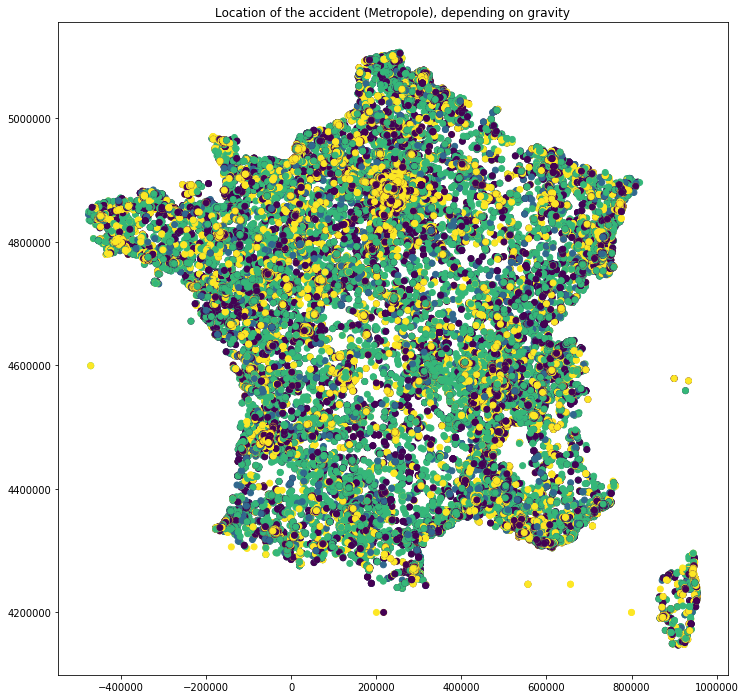

In [172]:
# Gravity of the accident
plt.figure(figsize=(12,12))
plt.scatter(usa_car_met['long'], usa_car_met['lat'], c=set_color(usa_car_met, 'grav'))
plt.title('Location of the accident (Metropole), depending on gravity')
plt.show()

In [174]:
usa_car_met['secu'] = usa_car_met['secu'].fillna(0)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


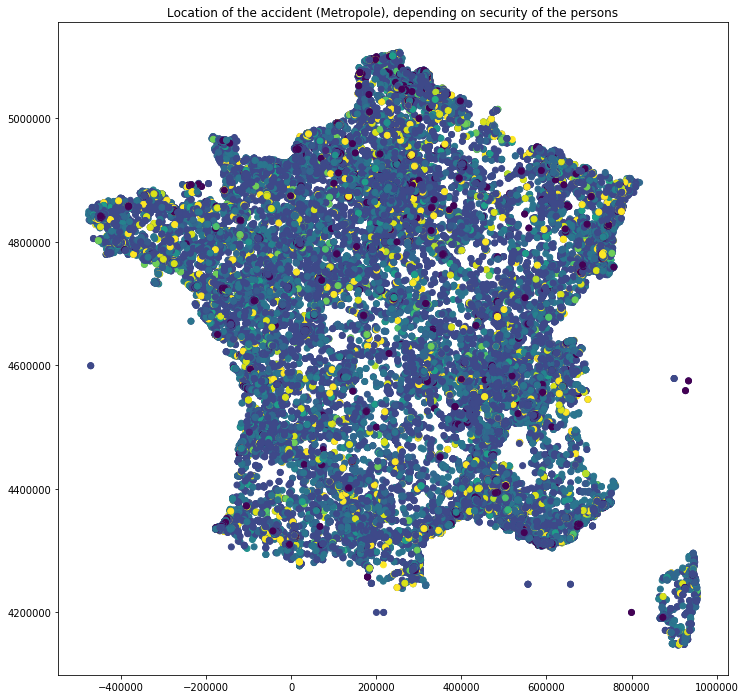

In [176]:
# Security of the persons
plt.figure(figsize=(12,12))
plt.scatter(usa_car_met['long'], usa_car_met['lat'], c=set_color(usa_car_met, 'secu'))
plt.title('Location of the accident (Metropole), depending on security of the persons')
plt.show()